# Сборный проект - 3 (Оценка риска ДТП)

## Описание проекта

Нужно создать систему, которая могла бы оценить риск ДТП по выбранному маршруту движения. Под риском понимается вероятность ДТП с любым повреждением транспортного средства. Как только водитель забронировал автомобиль, сел за руль и выбрал маршрут, система должна оценить уровень риска. Если уровень риска высок, водитель увидит предупреждение и рекомендации по маршруту.

Идея создания такой системы находится в стадии предварительного обсуждения и проработки. Чёткого алгоритма работы и подобных решений на рынке ещё не существует. Текущая задача — понять, возможно ли предсказывать ДТП, опираясь на исторические данные одного из регионов.

Идея решения задачи от заказчика:

1. Создать модель предсказания ДТП (целевое значение — `at_fault` (виновник) в таблице `parties`)
   - Для модели выбрать тип виновника — только машина (`car`).
   - Выбрать случаи, когда ДТП привело к любым повреждениям транспортного средства, кроме типа `SCRATCH` (царапина).
   - Для моделирования ограничиться данными за `2012` год — они самые свежие.
   - Обязательное условие — учесть фактор возраста автомобиля.

2. На основе модели исследовать основные факторы ДТП.

3. Понять, помогут ли результаты моделирования и анализ важности факторов ответить на вопросы:
   - Возможно ли создать адекватную системы оценки водительского риска при выдаче авто?
   - Какие ещё факторы нужно учесть?
   - Нужно ли оборудовать автомобиль какими-либо датчиками или камерой?

**План работы.**

1. Импорт необходимых библиотек.

2. Загрузка таблиц `SQL`.

   - Первичное исследование таблиц;
   - Все ли таблицы имеют набор данных;
   - Соответствует ли количество таблиц условию задачи;
   - Имеется ли общий ключ для связи таблиц.
   
  
3. Статистический анализ факторов ДТП.
    
    - Аналитические задачи.
    
        - В какие месяцы происходит наибольшее количество аварий. Анализ всего периода наблюдений (sql-запрос к таблице collisions, график, вывод).
        - Анализ серьёзности повреждений транспортного средства, исходя из состояния дороги в момент ДТП (sql-запрос к таблице collisions, график, вывод);
        - Самые частые причины ДТП (sql-запрос к таблице collisions, график, вывод).
        
    - Дополнительные аналитические задачи.
        
        - Анализ серьёзности повреждений транспортного средства, исходя из состояния состояния участника: физическое или с учётом принятых лекарств (sql-запрос к таблицам collisions и parties, график, вывод).
        - Количество ДТП в зависимости от состояния участника, с подозрением на прием наркотиков: `under drug influence` - в состоянии наркотического опьянения, `sleepy/fatigued` - сонный/усталый, `impairment - physical` - ухудшение состояния (sql-запрос к таблицам collisions и parties, график, вывод).
        - Количество ДТП по географическим районам: выбор 10 самых проблемных районов (sql-запрос к таблице collisions, график, вывод).
        - Влияние освещения на количество ДТП (sql-запрос к таблице collisions, график, вывод).
        - Анализ количества ДТП  в зависимости от возможности разговаривать по громкой связи (sql-запрос к таблицам collisions и parties, график, вывод).
        - Анализ возраста автомобиля при условии виновности участника ДТП: топ 10 по убыванию количества ДТП (sql-запрос к таблицам collisions, vehicles и parties, график, вывод).
        - Анализ количества ДТП в зависимости от типа второго участника (sql-запрос к таблицам collisions и parties, график, вывод).

4. Создание модели для оценки водительского риска.

    - Первичный отбор факторов, необходимых для модели (нужно отобрать те, которые могут влиять на вероятность ДТП) и подготока набора данных на основе первичного предположения заказчика.
        
        - Тип виновника — только машина (`car`).
        - Cлучаи, когда ДТП привело к любым значимым повреждениям автомобиля любого из участников — все, кроме типа SCRATCH (царапина).
        - Для моделирования берутся данные только за 2012 год.
        - Подготовка исходной таблицы осуществляется с помощью sql-запроса.
     
    - Статистическое исследование отобранных факторов.
    - Возможные корректировки, если они нужны. 
    - Вывод.

5. Подготовка данных для моделирования и обучение моделей.
   
    - кодирование и масштабирование.
    - разбиение на обучающую и тестовую выборки.
    - Выбор метрики для оценки модели, исходя из поставленной бизнесом задачи. Обоснование выбора. 
    - Поиск лучшей модели из перечня.
      
        - `DecisionTreeClassifier`. 
        - `RandomForestClassifier`.
        - `LogisticRegression`. 
        - `LGBMClassifier`. 
        - `CatBoostClassifier`. 
        
    - Вывод в виде сравнительной таблицы.

6. Проверка лучшей модели в работе.

    - Графический анализ «Матрица ошибок». Вывод полноты и точности на график.
    - Анализ важности основных факторов, влияющих на вероятность ДТП.

7. Общий вывод по модели.

**Описание таблиц данных.**
**ER - диаграмма.**

<img src="https://pictures.s3.yandex.net/resources/1.7_2880border_1_1654004672.png">

## Импорт необходимых библиотек.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sqlalchemy import create_engine

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, RobustScaler

from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector

from sklearn.model_selection import GridSearchCV, StratifiedKFold

from sklearn.metrics import f1_score, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

import warnings

warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", None)
pd.set_option("max_colwidth", 100)

RANDOM = 42

## Подключение базе.

Конфигураци для подключения к БД.

In [2]:
db_config = {
    'user': 'praktikum_student',  # имя пользователя,
    'pwd': 'Sdf4$2;d-d30pp',  # пароль,
    'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
    'port': 6432,  # порт подключения,
    'db': 'data-science-vehicle-db'  # название базы данных,
}

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db'],
)

In [3]:
engine = create_engine(connection_string)

### Первичное исследование таблиц

Т.к. может мыть несоответствие в количестве, содержании, название столбцов необходимо все еще раз перепроверить.

**Таблица `collisions`.**

In [4]:
query_collisions = '''
SELECT *
FROM collisions;
'''

collisions = pd.read_sql_query(query_collisions, con=engine)

In [5]:
collisions.head()

,case_id,county_city_location,county_location,distance,direction,intersection,weather_1,location_type,collision_damage,party_count,primary_collision_factor,pcf_violation_category,type_of_collision,motor_vehicle_involved_with,road_surface,road_condition_1,lighting,control_device,collision_date,collision_time
0,4083072,1942,los angeles,528.0,north,0.0,cloudy,highway,small damage,2,vehicle code violation,unsafe lane change,sideswipe,other motor vehicle,wet,normal,daylight,none,2009-01-22,07:25:00
1,4083075,4313,santa clara,0.0,None,1.0,clear,None,small damage,1,vehicle code violation,improper passing,hit object,fixed object,dry,normal,dark with street lights,functioning,2009-01-03,02:26:00
2,4083073,0109,alameda,0.0,None,1.0,clear,None,scratch,2,vehicle code violation,improper turning,broadside,other motor vehicle,dry,normal,dark with street lights,functioning,2009-01-11,03:32:00
3,4083077,0109,alameda,0.0,None,1.0,clear,None,scratch,2,vehicle code violation,automobile right of way,broadside,other motor vehicle,dry,normal,daylight,functioning,2009-01-11,10:35:00
4,4083087,4313,santa clara,0.0,None,1.0,clear,None,scratch,2,vehicle code violation,speeding,rear end,other motor vehicle,dry,None,dark with street lights,functioning,2009-01-02,22:43:00


In [6]:
collisions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400000 entries, 0 to 1399999
Data columns (total 20 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   case_id                      1400000 non-null  object 
 1   county_city_location         1400000 non-null  object 
 2   county_location              1400000 non-null  object 
 3   distance                     1400000 non-null  float64
 4   direction                    1059358 non-null  object 
 5   intersection                 1387781 non-null  float64
 6   weather_1                    1392741 non-null  object 
 7   location_type                518779 non-null   object 
 8   collision_damage             1400000 non-null  object 
 9   party_count                  1400000 non-null  int64  
 10  primary_collision_factor     1391834 non-null  object 
 11  pcf_violation_category       1372046 non-null  object 
 12  type_of_collision            1388176 non-n

In [7]:
for item in collisions.columns:
    print(
        f'Столбец: {item} :\nУникальные значения:\n{collisions[item].unique()}\n'
    )

Столбец: case_id :
Уникальные значения:
['4083072' '4083075' '4083073' ... '4082829' '4083008' '4083051']

Столбец: county_city_location :
Уникальные значения:
['1942' '4313' '0109' '1950' '3004' '1500' '3307' '1975' '3300' '3315'
 '5690' '3305' '1971' '3009' '1959' '3012' '1985' '4807' '3801' '3903'
 '1000' '3003' '0112' '3000' '5000' '0105' '3028' '5007' '3017' '4005'
 '4006' '3104' '3313' '5607' '5600' '0100' '5601' '3609' '1900' '1989'
 '3702' '1908' '4200' '1300' '4116' '3001' '0707' '4304' '1925' '0901'
 '1953' '0300' '4806' '3404' '0101' '4311' '5407' '4109' '4300' '0900'
 '5704' '4900' '4905' '4111' '4904' '2406' '4100' '4305' '3013' '3024'
 '3020' '3007' '2300' '4203' '1923' '2900' '2802' '2109' '3106' '3100'
 '5200' '3401' '1941' '3616' '5002' '4306' '4114' '3021' '3008' '3026'
 '3630' '0710' '0701' '3341' '0712' '0706' '3312' '0700' '4008' '3607'
 '4102' '1990' '5500' '1700' '1977' '0709' '1949' '3602' '1901' '1969'
 '1976' '4803' '3010' '4801' '3711' '4802' '1992' '3450' '1

Эта таблица описывает общую информацию о ДТП (+ расшифровка некоторых категорий). 

- **`case_id`**: идентификационный номер в базе данных;
- **`county_city_location`**: номер географических районов, где произошло ДТП;
- **`county_location`**: названия географических районов, где произошло ДТП;
- **`distance`**: расстояние от главной дороги (метры);
- **`direction`**: направление движения;
    
    - `north`- север;
    - `south` - юг;
    - `west` - запад;
    - `east` - восток;
    - `None` - не указано;
    
- **`intersection`**: является ли место происшествие перекрёстком;
    
    - `0` - не перекрёсток;
    - `1` - перекрёсток;
    - `nan` - неизвестно;

- **`weather_1`**: погода;

    - `cloudy` - облачно;
    - `clear` - ясно;
    - `raining` - дождь;
    - `None` - не указано;
    - `fog` - туман;
    - `snowing` - снегопад;
    - `other` - другое;
    - `wind` - ветер;
    
- **`location_type`**: тип дороги;

    - `highway` - шоссе;
    - `None` - не указано;
    - `ramp` - рампа;
    - `intersection` - перекрёсток;
    
- **`collision_damage`**: серьёзность происшествия;

    - `small damage` - отдельный элемент кузова под замену;
    - `scratch` - царапина;
    - `severe damage` - серьёзный ремонт, большая часть под замену;
    - `middle damage` - средний ремонт, машина в целом на ходу;
    - `fatal` - не подлежит восстановлению;
    
- **`party_count`**: количество участников;
- **`primary_collision_factor`**: основной фактор аварии;

    - `vehicle code violation` - нарушение правил ПДД;
    - `None` - не указано;
    - `unknown` - неизвестно;
    - `other improper driving` - другое неправильное вождение;
    - `other than driver` - кроме водителя;
    - `fell asleep` - заснул;
    
- **`pcf_violation_category`**: категория нарушения;

    - `unsafe lane change` - небезопасная смена полосы движения;
    - `improper passing` - неправильное движение;
    - `improper turning` - неправильный поворот;
    - `automobile right of way` - помеха справа;
    - `speeding` - превышение скорости;
    - `None` - не указано;
    - `dui` - нарушение пешехода;
    - `traffic signals and signs` - дорожные сигналы и знаки;
    - `wrong side of road` - неправильная сторона дороги (встречка);
    - `unknown` - неизвестно;
    - `following too closely` - опасное сближение;
    - `other hazardous violation` - другие нарушения;
    - `unsafe starting or backing` - опасный старт;
    - `other improper driving` - другое неправильное вождение;
    - `pedestrian right of way` - приоритет для пешеходов;
    - `hazardous parking` - неправильная парковка;
    - `other than driver (or pedestrian)` - кроме водителя или пешехода;
    - `fell asleep` - заснул;
    - `pedestrian violation` - нарушение пешеходами;
    - `other equipment` - другое оборудование;
    - `lights` - овещение;
    - `impeding traffic` - препятствие движению транспорта;
    - `brakes` - тормоза;
    - `pedestrian dui` - нарушение пешехода;
    
- **`type_of_collision`**: тип аварии;

    - `sideswipe` - со стороы;
    - `hit object` - удар объекта;
    - `broadside` - боковой удар;
    - `rear end` - столкновение задней частью;
    - `overturned` - опрокидывание;
    - `None` - не указано;
    - `head-on` - лоб в лоб;
    - `other` - другое;
    
- **`motor_vehicle_involved_with`**: дополнительные участники ДТП;

    - `other motor vehicle` - другой автомобиль;
    - `fixed object` - неподвижный объект;
    - `None` - не указано;
    - `non-collision` - не столкновение;
    - `parked motor vehicle` - припаркованный автомобиль;
    - `bicycle` - велосипедист;
    - `motor vehicle on other roadway` - автомобиль на другой проезжей части;
    - `other object` - другой объект;
    - `train` - поезд;
    - `animal` - животное;
    
- **`road_surface`**: состояние дороги;

    - `wet`- мокрая;
    - `dry` - сухая;
    - `slippery` - скользкая, грязная, маслянистая и т. д.;
    - `snowy` - заснеженная или обледенелая;
    - `None` - не указано;

- **`road_condition_1`**: дорожное состояние;

    - `normal`- нет ничего необычного;
    - `None` - не указано;
    - `construction` - зона строительства или ремонта;
    - `obstruction` - препятствие на проезжей части;
    - `holes` - ямы, глубокая колея;
    - `loose material` - сыпучий материал на проезжей части;
    - `other` - другое;
    - `flooded` - затоплено;
    - `reduced width` - уменьшенная ширина проезжей части;

- **`lighting`**: освещение;

    - `daylight` - дневной свет;
    - `dark with street lights` - темно - уличные фонари;
    - `dusk or dawn` - сумерки - рассвет;
    - `None` - не указано;
    - `dark with no street lights` - темно - нет уличных фонарей;
    - `dark with street lights not functioning` - темно - уличные фонари не работают;

- **`control_device`**: устройство управления;
    
    - `none`- не указано;
    - `functioning` - функционирует;
    - `not functioning` - не функционирует;
    - `obscured` - затемнённый;
    - `None` - нет;

- **`collision_date`**: дата происшествия;
- **`collision_time`**: время происшествия;

**Таблица `parties`.**

In [8]:
query_parties = '''
SELECT *
FROM parties;
'''

parties = pd.read_sql_query(query_parties, con=engine)

In [9]:
parties.head()

,id,case_id,party_number,party_type,at_fault,insurance_premium,party_sobriety,party_drug_physical,cellphone_in_use
0,22,3899454,1,road signs,1,29.0,had not been drinking,None,0.0
1,23,3899454,2,road signs,0,7.0,had not been drinking,None,0.0
2,29,3899462,2,car,0,21.0,had not been drinking,None,0.0
3,31,3899465,2,road signs,0,24.0,had not been drinking,None,0.0
4,41,3899478,2,road bumper,0,NaN,not applicable,not applicable,0.0


In [10]:
parties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2752408 entries, 0 to 2752407
Data columns (total 9 columns):
 #   Column               Dtype  
---  ------               -----  
 0   id                   int64  
 1   case_id              object 
 2   party_number         int64  
 3   party_type           object 
 4   at_fault             int64  
 5   insurance_premium    float64
 6   party_sobriety       object 
 7   party_drug_physical  object 
 8   cellphone_in_use     float64
dtypes: float64(2), int64(3), object(4)
memory usage: 189.0+ MB


In [11]:
for item in parties.columns:
    print(
        f'Столбец: {item} :\nУникальные значения:\n{parties[item].unique()}\n')

Столбец: id :
Уникальные значения:
[     22      23      29 ... 1906386 2403824 2403844]

Столбец: case_id :
Уникальные значения:
['3899454' '3899462' '3899465' ... '5456653' '5456655' '4770406']

Столбец: party_number :
Уникальные значения:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27]

Столбец: party_type :
Уникальные значения:
['road signs' 'car' 'road bumper' None 'building' 'other']

Столбец: at_fault :
Уникальные значения:
[1 0]

Столбец: insurance_premium :
Уникальные значения:
[ 29.   7.  21.  24.  nan  71.  15.  43.  59.  47.  62.  55.  74.  58.
  82.  53.  27.  34.  54.  14.  25.  57.  48.  49.  22.  32.  64.  46.
  18.  51.  52.  30.  36.  37.  40.  20.  42.  41.  16.   8.  23.  26.
  12.  76.  39.  63.  86.  61.  44.  69.   3.  33.  68.  88.  90.  56.
  81.  50.  31.  38.  45.  75.  19.  67.  10.  60.  35.  87.  83.  11.
   4.  28.  70.  17.   6.  13.  65.  66.   9.  73.   0.  84.  80.   2.
  92.  77.  85.  78. 104.   5.  72.  79.   1. 

Эта таблица содержит описание участников происшествия (+ расшифровка некоторых категорий). 

- **`id`**: уникальный идентификатор;
- **`case_id`**: идентификационный номер в базе данных;
- **`party_number`**: номер участника происшествия;
- **`party_type`**: тип участника происшествия;

    - `road signs`- дорожные знаки;
    - `car` - машина;
    - `road bumper` - отбойник;
    - `building` - строения;
    - `other` - другое;
    - `None` - не указано;

- **`at_fault`**: виновность участника;

    - `1`- виноват;
    - `0`- не виноват;
    
- **`insurance_premium`**: сумма страховки (тыс. USD);
- **`party_sobriety`**: состояние участника: физическое или с учётом принятых лекарств;

    - `had not been drinking`- не пил;
    - `not applicable` - не оценивался;
    - `impairment unknown` - неизвестное ухудшение;
    - `None` - не указано;
    - `had been drinking, not under influence` - был пьян, не находился под влиянием;
    - `had been drinking, under influence` - был пьян, под влиянием;
    - `had been drinking, impairment unknown` - был пьян, нарушения неизвестны;
    
- **`party_drug_physical`**: трезвость участника;
    
    - `not applicable`- не оценивался;
    - `G` - Impairment Unknown (не известно);
    - `under drug influence` - в состоянии наркотического опьянения;
    - `sleepy/fatigued` - сонный/усталый;
    - `impairment - physical` - ухудшение состояния;
    - `None` - не указано;

- **`cellphone_in_use`**: наличие телефона в автомобиле (возможности разговаривать по громкой связи).

    - `1`- есть громкая связь;
    - `0`- нет громкой связи;
    - `nan` - не указано.

**Таблица `vehicles`.**

In [12]:
query_vehicles = '''
SELECT *
FROM vehicles;
'''

vehicles = pd.read_sql_query(query_vehicles, con=engine) 

In [13]:
vehicles.head()

,id,case_id,party_number,vehicle_type,vehicle_transmission,vehicle_age
0,1175713,5305032,2,sedan,manual,3.0
1,1,3858022,1,sedan,auto,3.0
2,1175712,5305030,1,sedan,auto,3.0
3,1175717,5305033,3,sedan,auto,5.0
4,1175722,5305034,2,sedan,auto,5.0


In [14]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021234 entries, 0 to 1021233
Data columns (total 6 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1021234 non-null  int64  
 1   case_id               1021234 non-null  object 
 2   party_number          1021234 non-null  int64  
 3   vehicle_type          1021234 non-null  object 
 4   vehicle_transmission  997575 non-null   object 
 5   vehicle_age           996652 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 46.7+ MB


In [15]:
for item in vehicles.columns:
    print(
        f'Столбец: {item} :\nУникальные значения:\n{vehicles[item].unique()}\n'
    )

Столбец: id :
Уникальные значения:
[1175713       1 1175712 ... 1175687 1175693 1175699]

Столбец: case_id :
Уникальные значения:
['5305032' '3858022' '5305030' ... '5304994' '5305002' '5305007']

Столбец: party_number :
Уникальные значения:
[ 2  1  3  4  5  7  6  8 12 13  9 10 11 15 18 19 22 23 25 27 14 16 17 20
 21 24 26]

Столбец: vehicle_type :
Уникальные значения:
['sedan' 'hatchback' 'coupe' 'minivan' 'other']

Столбец: vehicle_transmission :
Уникальные значения:
['manual' 'auto' None]

Столбец: vehicle_age :
Уникальные значения:
[  3.   5.   9.  10.   4.  11.   1.   6.   8.   0.   2.   7.  nan  12.
  13.  15.  14.  16.  17. 161.  19.  18.  20.]



Эта таблица содержит информацию о пострадавших машинах (+ расшифровка некоторых категорий). 

- **`id`**: уникальный идентификатор;
- **`case_id`**: идентификационный номер в базе данных;
- **`party_number`**: номер участника происшествия;
- **`vehicle_type`**: тип кузова;
    - `sedan` - седан;
    - `hatchback` - хэтчбэк;
    - `coupe` - купе;
    - `minivan` - минивэн;
    - `other` - другое;
- **`vehicle_transmission`**: тип КПП;
    - `manual` - ручная;
    - `auto` - автомат;
    - `None` - не указано;
- **`vehicle_age`**: возраст автомобиля (в годах).

**Таблица `case_ids`.**

In [16]:
query_case_ids = '''
SELECT *
FROM case_ids;
'''

case_ids = pd.read_sql_query(query_case_ids, con=engine) 

In [17]:
case_ids.head()

,case_id,db_year
0,0081715,2021
1,0726202,2021
2,3858022,2021
3,3899441,2021
4,3899442,2021


In [18]:
case_ids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400000 entries, 0 to 1399999
Data columns (total 2 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   case_id  1400000 non-null  object
 1   db_year  1400000 non-null  object
dtypes: object(2)
memory usage: 21.4+ MB


In [19]:
case_ids['db_year'].unique()

array(['2021'], dtype=object)

Эта таблица содержит информацию о пострадавших машинах. 

- **`case_id`**: идентификационный номер в базе данных;
- **`db_year`**: в диаграмме это `Case_id`, видимо это год создания БД.

**Информация по `PK` и `FK` по всем таблицам.** 

In [20]:
query_keys = '''
SELECT constraint_name,
       table_name,
       column_name
FROM information_schema.key_column_usage
'''
keys = pd.read_sql_query(query_keys, con=engine)

keys

,constraint_name,table_name,column_name
0,case_ids_pk,case_ids,case_id
1,parties_pk,parties,id
2,vehicles_pk,vehicles,id
3,collisions_case_ids_case_id_fk,collisions,case_id
4,parties_case_ids_case_id_fk,parties,case_id
5,vehicles_case_ids_case_id_fk,vehicles,case_id


Структура БД такова, что есть таблица `case_ids`, которая имеет два поля `case_id` и `db_year`.

`case_id` первичным ключом для `case_ids` и внешним ключом сразу для трех таблиц `collisions`, `parties` и `vehicles`. Т.е  объединение таблиц можно делать через головную таблицу `case_ids`. Хотя видно, что количество уникальных `case_id` у таблиц  `case_ids` и  `collisions` одинаковое (по 1_400_000 уникальных записей). 
Зачем выведена головная таблица - не понятно. Скорее всего в этой таблице было запланировано, что-то еще кроме поля со значением `2021`.

Связи по `PK` и `FK` между `collisions` - `parties` и `collisions` - `vehicles` нету. Хотя через `case_id` объединить их можно.

В `parties` и `vehicles` есть неуникальные `case_id` и неуникальные `party_number`. Для уникальности при объединении можно использовать равенство и того и другого.

**Небольшой анализ полноты заполнения данных.**

In [21]:
query_temp = '''
SELECT COUNT(case_id) AS total,
       DATE_TRUNC('month', collision_date)::date AS month
FROM collisions
GROUP BY DATE_TRUNC('month', collision_date)
ORDER BY DATE_TRUNC('month', collision_date);

'''
data_temp = pd.read_sql_query(query_temp, con=engine)

data_temp

,total,month
0,35062,2009-01-01
1,34480,2009-02-01
2,36648,2009-03-01
3,35239,2009-04-01
4,36916,2009-05-01
5,34202,2009-06-01
6,35161,2009-07-01
7,34508,2009-08-01
8,35555,2009-09-01
9,37835,2009-10-01


Видно, что адекватно база заполнялась до июня 2012 года. Далее идет резкое падение количства ДТП. 2013 год заполнен не полностью. Далее пустота и пара значений 2020 года. 

Для аналитических задач можно будет ограничиться данными по 2012 год включительно. Там хотябы заполнены все месяцы. 2013 и 2020 годы можно отбросить.

Т.к. все исследования и генерация датасета для обучения будет делаться при помощи `SQL` запросов, то все созданные переменные больше не нужны и их можно удалить для освобождения памяти.

In [22]:
del vehicles, parties, collisions, case_ids, keys, data_temp, query_case_ids, query_collisions, query_vehicles, query_parties, query_keys, query_temp

##  Статистический анализ факторов ДТП

Функции для визуализации результатов запросов и исследовательского анализы финального датасета.

In [1]:
def barplot_drow(dataset,
                 x_ax,
                 y_ax,
                 figsize=(16, 10),
                 hue=None,
                 yscale=False,
                 float_annot=False,
                 font_xtick=14,
                 rotation_annot=0,
                 size_annot=14,
                 color_palette='bright',
                 title_plot='',
                 x_label='',
                 y_label='',
                 title_font_size=20,
                 xlabel_font_size=18,
                 ylabel_font_size=18):
    '''
    Функция для визуализации данных в виде столбчатой диаграммы Barplot.
    
    dataset: датасет данными
    x_ax: столбец с категориями для оси Х
    y_ax: столбез с количественными значениями для категориальных переменных для оси Y
    figsize: размер диаграммы, по умолчанию (16, 10) 
    hue: аргумент для групппировки данных по категории, по умолчанию None 
    y_scale: логарифмическое масштабирование, по умолчанию False
    float_annot: формат вывода подписей цифровых значений столбцов в float формате, по умолчанию False
    font_xtick: размер шрифта для подписей по оси Х
    rotation_annot: угол наклона выведенных значений к каждому столбцу, по умолчанию 0
    size_annot: размер шрифта для вывода значений столбцов диаграммы, по умолчанию 14
    color_palette: цветовая палитра, по умолчанию 'bright'
    title_plot='': название диаграммы, по умолчанию пустая строка
    x_label='': название оси Х, по умолчанию пустая строка
    y_label='': название оси Y, по умолчанию пустая строка
    title_font_size: размер шрифта для названия диаграммы, по умолчанию 20
    xlabel_font_size: размер шрифта для названия по оси Х, по умолчанию 18
    ylabel_font_size: размер шрифта для названия по оси Y, по умолчанию 18
    
    '''

    sns.set_theme(style="darkgrid")

    fig = plt.subplots(figsize=figsize)
    ax = sns.barplot(data=dataset,
                     x=x_ax,
                     y=y_ax,
                     palette=color_palette,
                     hue=hue)

    if yscale:
        ax.set_yscale('log')

    ax.set_xticklabels(ax.get_xticklabels(),
                       rotation=45,
                       horizontalalignment='right',
                       fontsize=font_xtick)

    for bar in ax.patches:
        if not float_annot:
            ax.annotate(format(bar.get_height(), '.0f'),
                        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                        ha='center',
                        va='center',
                        size=size_annot,
                        xytext=(0, 8),
                        textcoords='offset points',
                        rotation=rotation_annot)
        else:
            ax.annotate(format(bar.get_height(), '.2f'),
                        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                        ha='center',
                        va='center',
                        size=size_annot,
                        xytext=(0, 8),
                        textcoords='offset points',
                        rotation=rotation_annot)
            

    ax.set_title(title_plot, fontsize=title_font_size)
    ax.set_xlabel(x_label, fontsize=xlabel_font_size)
    ax.set_ylabel(y_label, fontsize=ylabel_font_size)
    plt.show()


def pie_drow(labels,
             pies,
             figsize=(20, 15),
             title_legend='',
             title_legend_font_size=20,
             head_title='',
             title_font_size=20,
             color_label="black",
             autotexts_font_size=20):
    '''
    Функция для построения круговой диаграммы
    
    labels: столбец с категориями
    pies: столбец с количественным значением категорий
    figsize: размер диаграммы, по умолчанию (20, 15) 
    title_legend: заголовок для легенды графика, по умолчанию пустой - '',
    title_legend_font_size: размер шрифта для заголовка легенды, по умолчанию 20,
    head_title: название диаграммы, по умолчанию пустое - '',
    title_font_size: размер шрифта для названия диаграммы, по умолчанию 20
    color_label: цвет надписей на диаграмме, по умолчанию  "black",
    autotexts_font_size: размер шрифта подписей диаграммы, по умолчанию 20:
    
    '''

    sns.set_theme(style="darkgrid")

    labels_list = labels.tolist()

    pie_list = pies.tolist()

    # Окантовка кусков диаграммы
    wp = {"linewidth": 2, "edgecolor": "white"}

    sns.set(font_scale=2)

    fig, ax = plt.subplots(figsize=figsize)

    wedges, texts, autotexts = ax.pie(
        pie_list,
        autopct=lambda p: "{:.2f}% \n {:.0f}".format(p,
                                                     p * sum(pie_list) / 100),
        labels=labels_list,
        shadow=True,
        startangle=90,
        wedgeprops=wp,
        textprops=dict(color=color_label),
    )

    ax.legend(
        wedges,
        labels_list,
        title=title_legend,
        loc="upper left",
        fontsize=title_legend_font_size,
        bbox_to_anchor=(1.2, 0, 0, 1.2),
    )

    plt.setp(autotexts, size=autotexts_font_size, weight="bold")

    ax.set_title(head_title, fontsize=title_font_size)

    plt.show()


def countplot_drow(dataset,
                   x_ax,
                   figsize=(16, 10),
                   hue=None,
                   yscale=False,
                   font_xtick=14,
                   rotation_annot=0,
                   size_annot=14,
                   color_palette='bright',
                   title_plot='',
                   x_label='',
                   y_label='',
                   title_font_size=20,
                   xlabel_font_size=18,
                   ylabel_font_size=18,
                   hue_legend_list=[]):
    '''
    Функция для визуализации данных в виде столбчатой диаграммы Countplot. То же самое, что и барплот, только функция уже явно задана, и она считает количество значений в каждой категории.
    
    dataset: датасет данными
    x_ax: столбец с категориями для оси Х
    figsize: размер диаграммы, по умолчанию (16, 10) 
    hue: аргумент для групппировки данных по категории, по умолчанию None 
    y_scale: логарифмическое масштабирование, по умолчанию False
    float_annot: формат вывода подписей цифровых значений столбцов в float формате, по умолчанию False
    font_xtick: размер шрифта для подписей по оси Х
    rotation_annot: угол наклона выведенных значений к каждому столбцу, по умолчанию 0
    size_annot: размер шрифта для вывода значений столбцов диаграммы, по умолчанию 14
    color_palette: цветовая палитра, по умолчанию 'bright'
    title_plot='': название диаграммы, по умолчанию пустая строка
    x_label='': название оси Х, по умолчанию пустая строка
    y_label='': название оси Y, по умолчанию пустая строка
    title_font_size: размер шрифта для названия диаграммы, по умолчанию 20
    xlabel_font_size: размер шрифта для названия по оси Х, по умолчанию 18
    ylabel_font_size: размер шрифта для названия по оси Y, по умолчанию 18
    hue_legend_list: список значений для легенды диаграммы, по умолчанию пустой 
    
    '''

    sns.set_theme(style="darkgrid")

    fig = plt.subplots(figsize=figsize)

    ax = sns.countplot(data=dataset, x=x_ax, hue=hue, palette=color_palette)

    if yscale:
        ax.set_yscale('log')

    ax.set_xticklabels(ax.get_xticklabels(),
                       rotation=45,
                       horizontalalignment='right',
                       fontsize=font_xtick)

    for bar in ax.patches:
        ax.annotate(format(bar.get_height(), '.0f'),
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center',
                    va='center',
                    size=size_annot,
                    xytext=(0, 8),
                    textcoords='offset points',
                    rotation=rotation_annot)

    legend_handles, _ = ax.get_legend_handles_labels()
    ax.legend(legend_handles, hue_legend_list, bbox_to_anchor=(1, 1))

    ax.set_title(title_plot, fontsize=title_font_size)
    ax.set_xlabel(x_label, fontsize=xlabel_font_size)
    ax.set_ylabel(y_label, fontsize=ylabel_font_size)

    plt.show()


def drow_boxplot(column,
                 figsize=(8, 5),
                 orient='h',
                 title_plot='',
                 x_label='',
                 y_label='',
                 title_font_size=16,
                 xlabel_font_size=14,
                 ylabel_font_size=14):
    '''
    Функция для построения диаграммы размаха
    
    column: столбец по поторому строится диаграмма размаха
    figsize: размер диаграммы, по умолчанию (8, 5) 
    orient: ориентация по поризонтали или вертикали, по умолчанию 'h' - горизонтальная 
    title_plot='': название диаграммы, по умолчанию пустая строка
    x_label='': название оси Х, по умолчанию пустая строка
    y_label='': название оси Y, по умолчанию пустая строка
    title_font_size: размер шрифта для названия диаграммы, по умолчанию 16
    xlabel_font_size: размер шрифта для названия по оси Х, по умолчанию 14
    ylabel_font_size: размер шрифта для названия по оси Y, по умолчанию 14
    color_palette: цветовая палитра, по умолчанию 'bright'
    
    '''

    plt.figure(figsize=figsize)

    ax = sns.boxplot(data=column, orient='h', color='g', fliersize=6)

    ax.set_title(title_plot, fontsize=title_font_size)
    ax.set_xlabel(x_label, fontsize=xlabel_font_size)
    ax.set_ylabel(y_label, fontsize=ylabel_font_size)

    plt.show()

### Наибольшее количество аварий по месяцам. Анализ всего периода наблюдений. 

**SQL - запрос.**

In [24]:
query = '''
WITH tmp AS
    (SELECT EXTRACT(MONTH FROM CAST(collision_date AS date)) AS month,
           COUNT(case_id) AS total
    FROM collisions
    WHERE collision_date BETWEEN '2009-01-01' AND '2012-12-31'
    GROUP BY month
    ORDER BY month)
SELECT CASE 
        WHEN month = 1 THEN 'Январь'
        WHEN month = 2 THEN 'Февраль'
        WHEN month = 3 THEN 'Март'
        WHEN month = 4 THEN 'Апрель'
        WHEN month = 5 THEN 'Май'
        WHEN month = 6 THEN 'Июнь'
        WHEN month = 7 THEN 'Июль'
        WHEN month = 8 THEN 'Август'
        WHEN month = 9 THEN 'Сентябрь'
        WHEN month = 10 THEN 'Октябрь'
        WHEN month = 11 THEN 'Ноябрь'
        ELSE 'Декабрь'
       END AS month,
       total
FROM tmp;
'''
data = pd.read_sql_query(query, con=engine)

data

,month,total
0,Январь,131900
1,Февраль,128750
2,Март,139534
3,Апрель,130175
4,Май,130316
5,Июнь,102593
6,Июль,102225
7,Август,104089
8,Сентябрь,105159
9,Октябрь,112237


**График.**

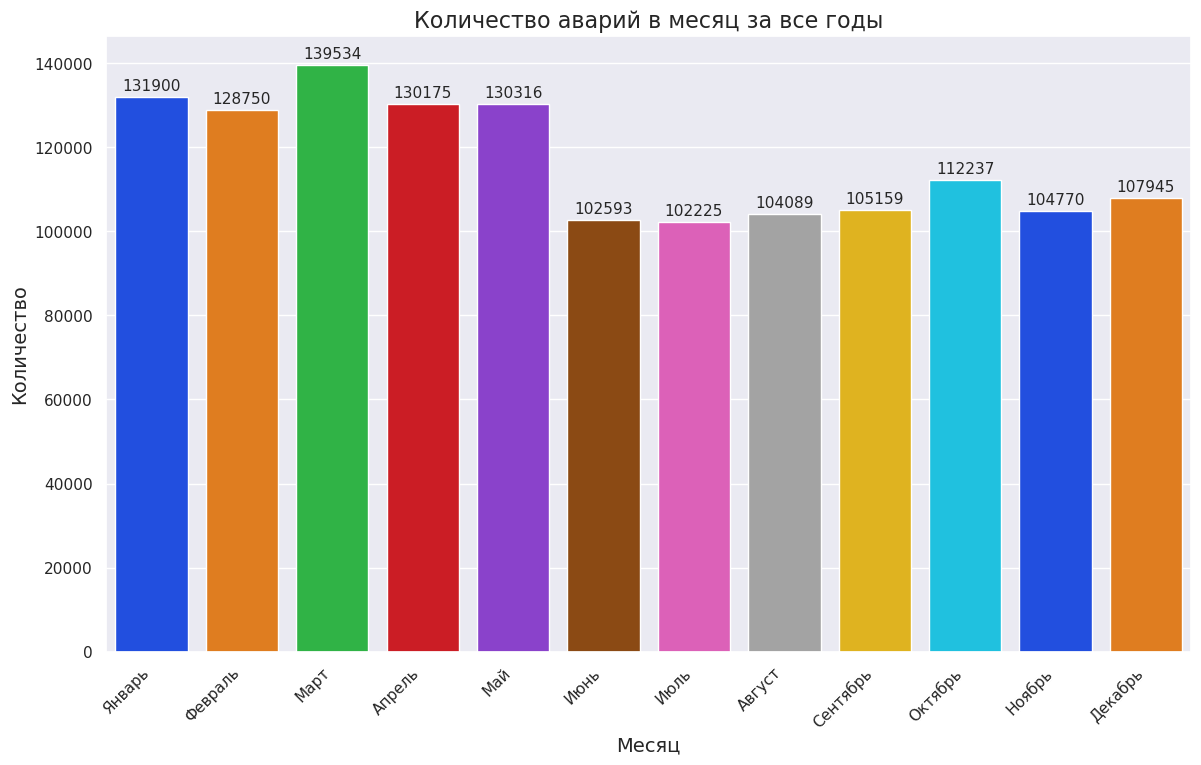

In [25]:
barplot_drow(data,
             data['month'],
             data['total'],
             figsize=(14, 8),
             font_xtick=11,
             size_annot=11,
             color_palette='bright',
             title_plot='Количество аварий в месяц за все годы',
             x_label='Месяц',
             y_label='Количество',
             title_font_size=16,
             xlabel_font_size=14,
             ylabel_font_size=14)

**Вывод.**

Наибольшее количство аварий происходит в марте, видимо это связано с погодными условиями в регионе.
Летом меньше всего аварий. В октябре происходит небольшой рост,  скорее всего начинаются заморозки.

### Анализ серьёзности повреждений транспортного средства, исходя из состояния дороги в момент ДТП (таблица collisions)

**SQL - запрос.**

In [26]:
query = '''
SELECT CASE
        WHEN collision_damage = 'fatal' THEN 'Не подлежит восстановлению'
        WHEN collision_damage = 'middle damage' THEN 'Средний ремонт, машина в целом на ходу'
        WHEN collision_damage = 'scratch' THEN 'Царапина'
        WHEN collision_damage = 'severe damage' THEN 'Серьёзный ремонт, большая часть под замену'
        ELSE 'Отдельный элемент кузова под замену'
       END AS collision_damage,
       CASE
        WHEN road_surface = 'dry' THEN 'Сухая дорога'
        WHEN road_surface = 'slippery' THEN 'Скользкая, грязная, маслянистая и т. д. дорога'
        WHEN road_surface = 'snowy' THEN 'Заснеженная или обледенелая дорога'
        WHEN road_surface = 'wet' THEN 'Мокрая дорога'
        ELSE 'Не указано'
       END AS road_surface,
       COUNT(case_id) AS total
FROM collisions
WHERE collision_date BETWEEN '2009-01-01' AND '2012-12-31'
GROUP BY road_surface, collision_damage;
'''
data = pd.read_sql_query(query, con=engine)

data.head()

,collision_damage,road_surface,total
0,Не подлежит восстановлению,Сухая дорога,9573
1,"Средний ремонт, машина в целом на ходу",Сухая дорога,151012
2,Царапина,Сухая дорога,307958
3,"Серьёзный ремонт, большая часть под замену",Сухая дорога,27826
4,Отдельный элемент кузова под замену,Сухая дорога,745379


**График.**

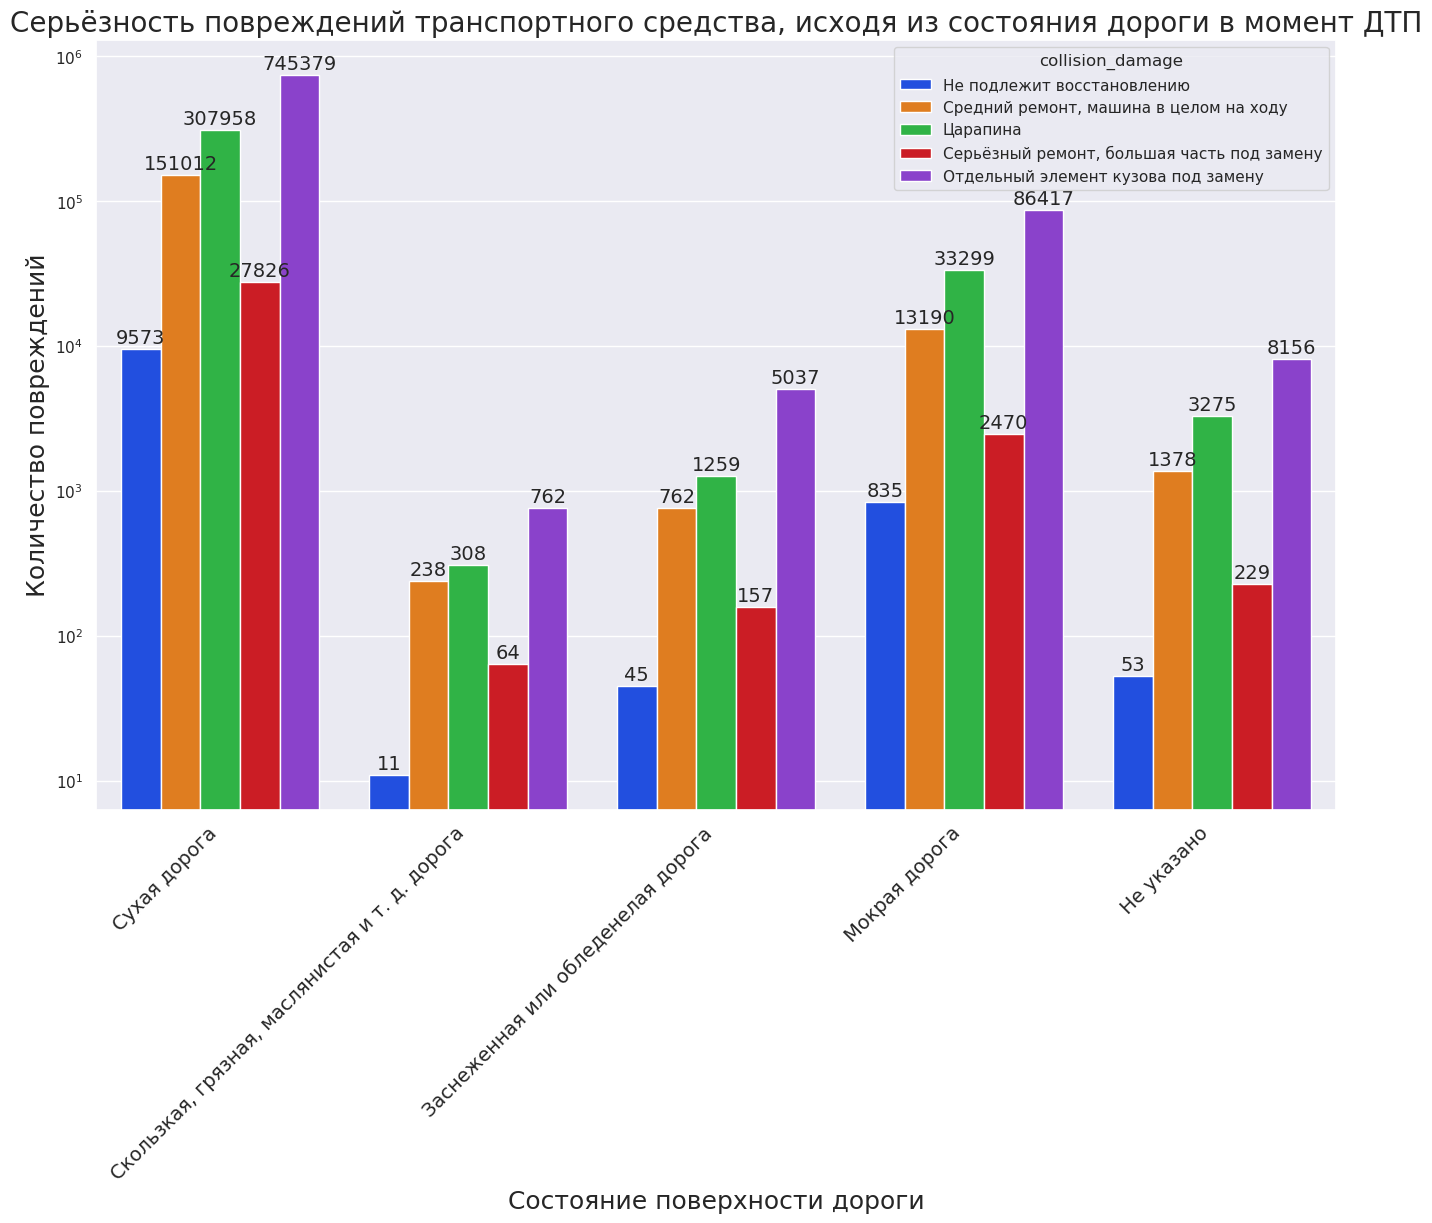

In [27]:
barplot_drow(data,
             data['road_surface'],
             data['total'],
             figsize=(16, 10),
             hue='collision_damage',
             yscale=True,
             font_xtick=14,
             rotation_annot=0,
             size_annot=14,
             color_palette='bright',
             title_plot='Серьёзность повреждений транспортного средства, исходя из состояния дороги в момент ДТП',
             x_label='Состояние поверхности дороги',
             y_label='Количество повреждений')

**Вывод.**

Распределение серьезности повреждений авто в ДТП в зависимости от состояния поверхности дороги одинаковое по всем типам:

- больше всего повреждений 'Отдельный элемент кузова под замену',
- царапина,
- средний ремонт,
- серьезный ремонт,
- списание.

По характеру состояния дороги больше всего ДТП происходит на сухой дороге, т.к. дороги в большинстве случаев все-таки сухие, далее мокрая дорога, снег/лед и редкие случаи технической грязи (маслянистость и т.д).  Хотя посерединке вообще неисзвестное состояние дороги.

### Самые частые причины ДТП (таблица collisions)

**SQL - запрос.**

In [28]:
query = '''
SELECT CASE
        WHEN primary_collision_factor = 'fell asleep' THEN 'Заснул'
        WHEN primary_collision_factor = 'other improper driving' THEN 'Другое неправильное вождение'
        WHEN primary_collision_factor = 'other than driver' THEN 'Кроме водителя'
        WHEN primary_collision_factor = 'vehicle code violation' THEN 'Нарушение ПДД'
        WHEN primary_collision_factor = 'unknown' THEN 'Неизвестно'
        ELSE 'Не указано'
       END AS primary_collision_factor,
       COUNT(case_id) AS total
FROM collisions
WHERE collision_date BETWEEN '2009-01-01' AND '2012-12-31'
GROUP BY primary_collision_factor
ORDER BY total;
'''
data = pd.read_sql_query(query, con=engine)

data

,primary_collision_factor,total
0,Заснул,117
1,Не указано,8161
2,Другое неправильное вождение,8469
3,Кроме водителя,29769
4,Неизвестно,37006
5,Нарушение ПДД,1316171


**График.**

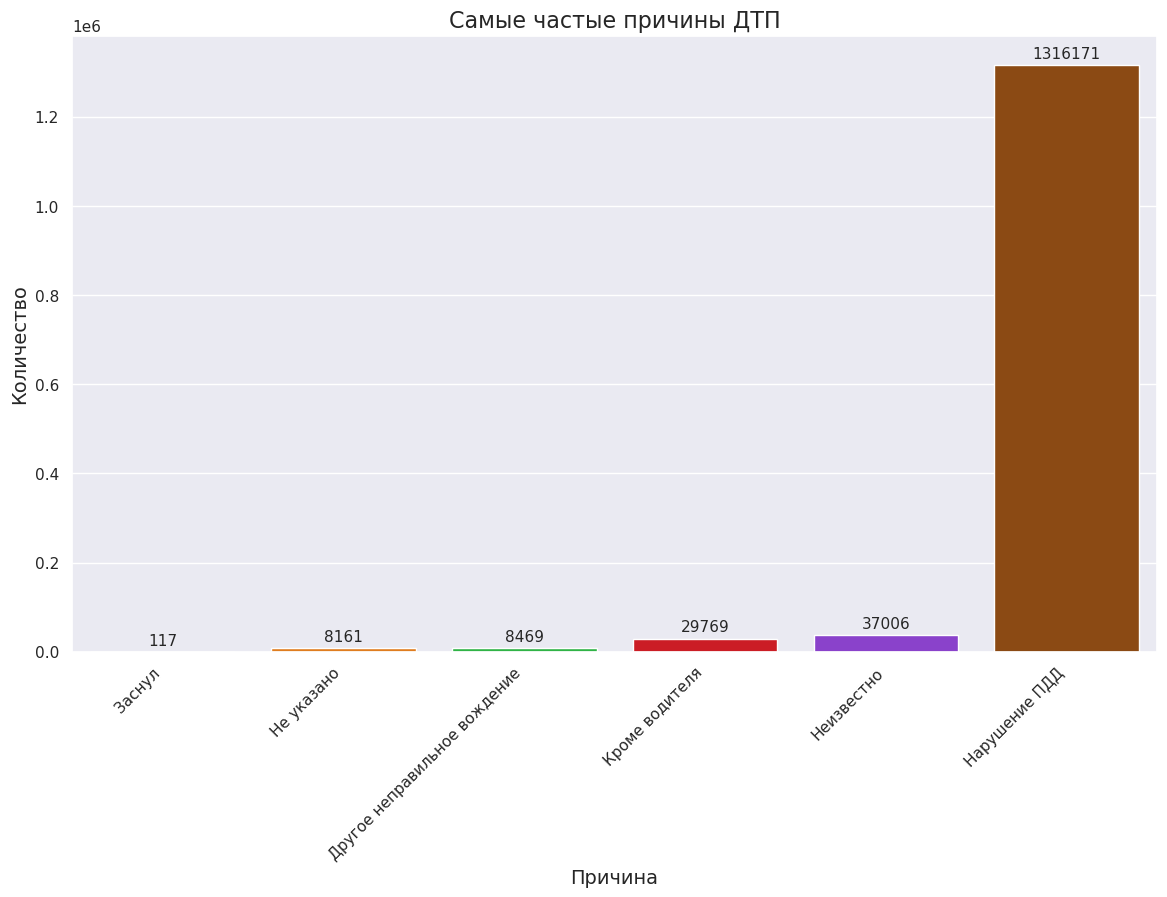

In [29]:
barplot_drow(data,
             data['primary_collision_factor'],
             data['total'],
             figsize=(14, 8),
             font_xtick=11,
             size_annot=11,
             color_palette='bright',
             title_plot='Самые частые причины ДТП',
             x_label='Причина',
             y_label='Количество',
             title_font_size=16,
             xlabel_font_size=14,
             ylabel_font_size=14)

**Вывод.**

Больше всего ДТП конечно же происходит из-за нарушений ПДД. Остальные факторы серьезно меньше.  

### Анализ серьёзности повреждений транспортного средства, исходя из состояния состояния участника: физическое или с учётом принятых лекарств.

**SQL - запрос.**

In [30]:
query = '''
SELECT CASE
        WHEN c.collision_damage = 'fatal' THEN 'Не подлежит восстановлению'
        WHEN c.collision_damage = 'middle damage' THEN 'Средний ремонт, машина в целом на ходу'
        WHEN c.collision_damage = 'scratch' THEN 'Царапина'
        WHEN c.collision_damage = 'severe damage' THEN 'Серьёзный ремонт, большая часть под замену'
        ELSE 'Отдельный элемент кузова под замену'
       END AS collision_damage,
       CASE
        WHEN p.party_sobriety = 'had not been drinking' THEN 'не пил'
        WHEN p.party_sobriety = 'not applicable' THEN 'не оценивался'
        WHEN p.party_sobriety = 'impairment unknown' THEN 'неизвестное ухудшение'
        WHEN p.party_sobriety = 'had been drinking, not under influence' THEN 'был пьян, не находился под влиянием'
        WHEN p.party_sobriety = 'had been drinking, under influence' THEN 'был пьян, под влиянием'
        WHEN p.party_sobriety = 'had been drinking, impairment unknown' THEN 'был пьян, нарушения неизвестны'
        ELSE 'Не указано'
       END AS party_sobriety,
       COUNT(ci.case_id) AS total
FROM case_ids AS ci
     JOIN collisions AS c ON ci.case_id = c.case_id
     JOIN parties AS p ON ci.case_id = p.case_id
     WHERE c.collision_date BETWEEN '2009-01-01' AND '2012-12-31'
     GROUP BY collision_damage, party_sobriety;
'''
data = pd.read_sql_query(query, con=engine)

data.head()

,collision_damage,party_sobriety,total
0,Не подлежит восстановлению,"был пьян, нарушения неизвестны",430
1,Не подлежит восстановлению,"был пьян, не находился под влиянием",358
2,Не подлежит восстановлению,"был пьян, под влиянием",3597
3,Не подлежит восстановлению,не пил,11926
4,Не подлежит восстановлению,неизвестное ухудшение,1830


**График.**

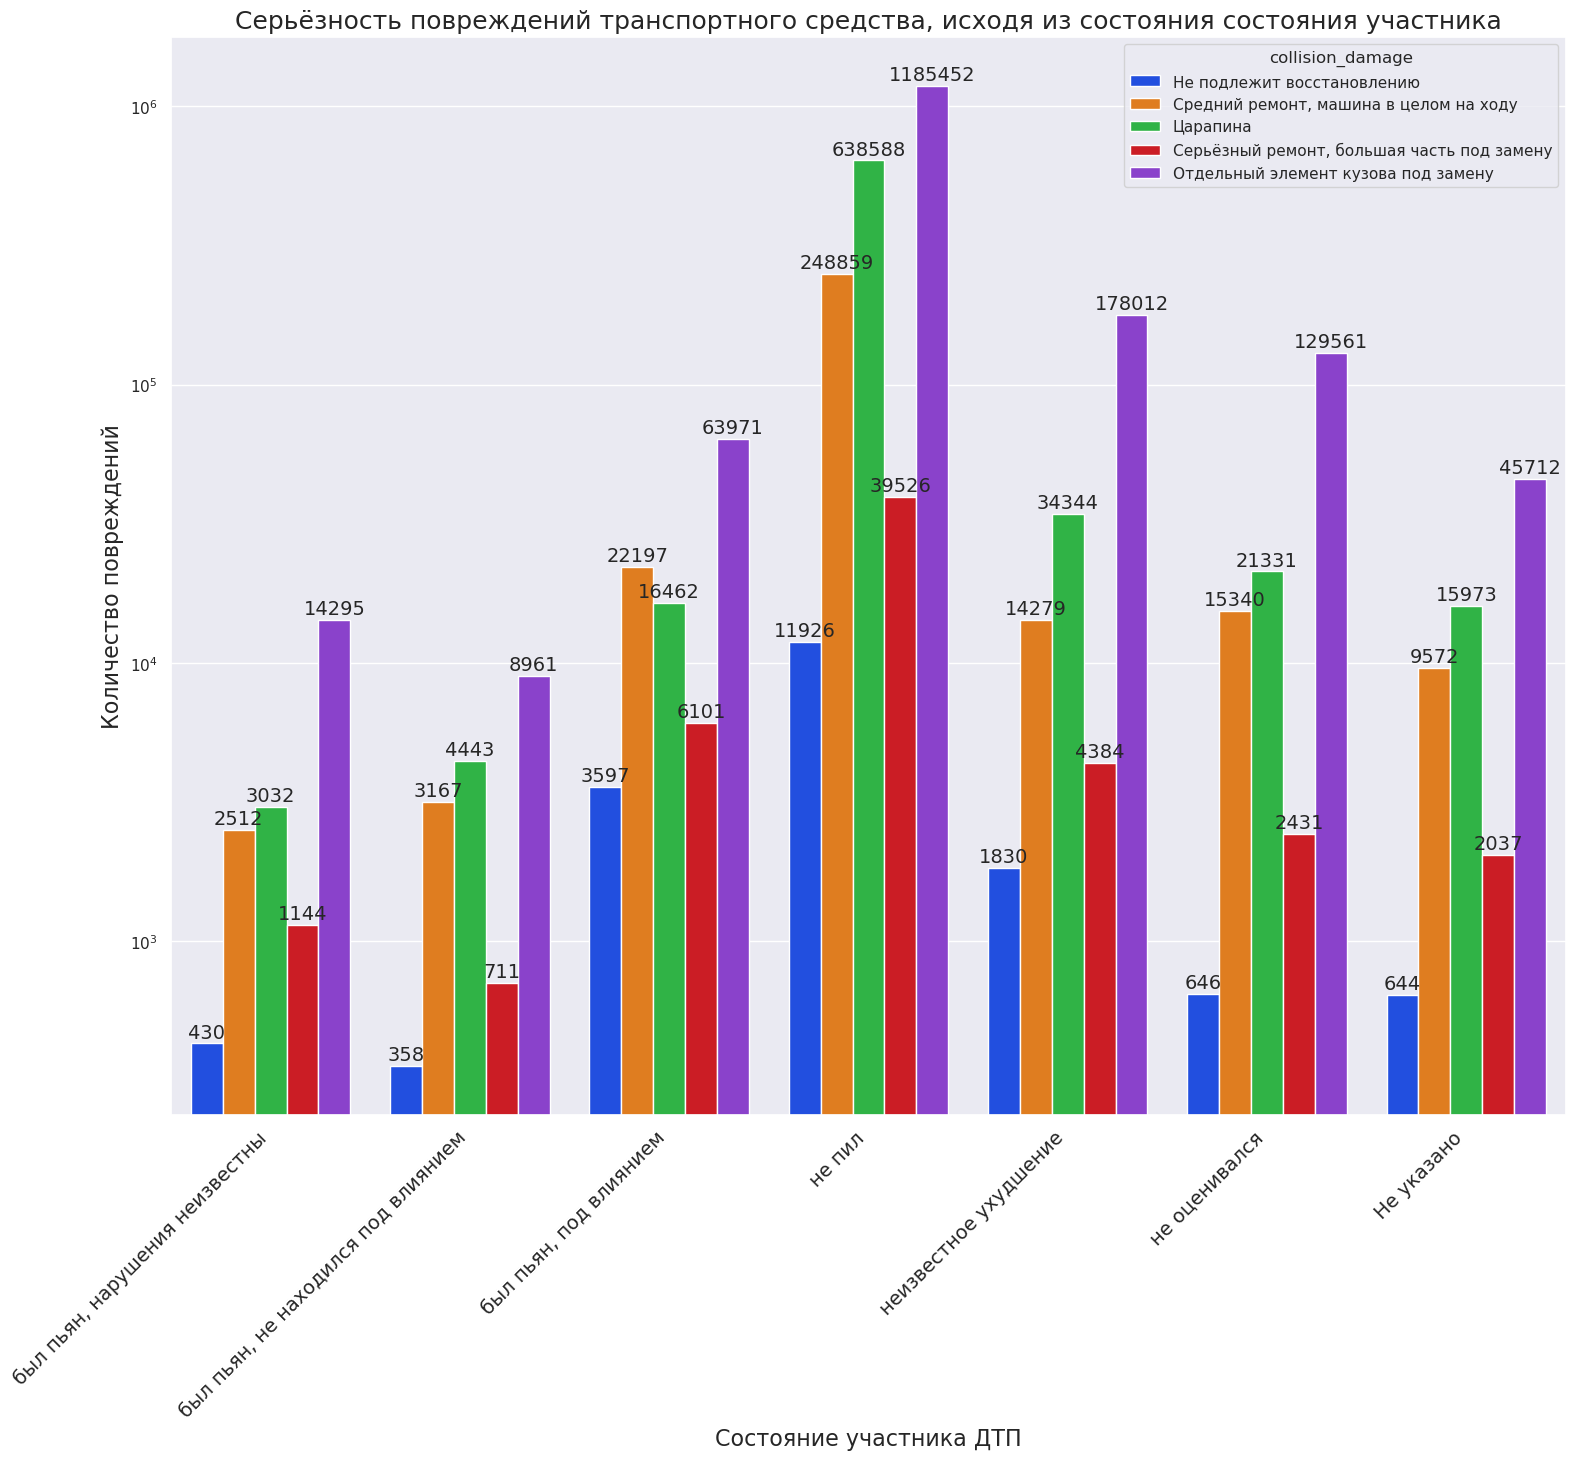

In [31]:
barplot_drow(data,
             data['party_sobriety'],
             data['total'],
             figsize=(18, 14),
             hue='collision_damage',
             yscale=True,
             font_xtick=14,
             rotation_annot=0,
             size_annot=14,
             color_palette='bright',
             title_plot='Серьёзность повреждений транспортного средства, исходя из состояния состояния участника',
             x_label='Состояние участника ДТП',
             y_label='Количество повреждений',
             title_font_size=18,
             xlabel_font_size=16,
             ylabel_font_size=16)

**Вывод.**

Распределение серьезности повреждений авто в ДТП в зависимости , исходя из состояния состояния участника одинаковое по всем типам:

- больше всего повреждений 'Отдельный элемент кузова под замену',
- царапина,
- средний ремонт,
- серьезный ремонт,
- списание.

По состоянию естественно большинство аварий происходит в трезвом виде. Максимальное количетсво случаем по всем видам ущерба.

Если взять выпивших, хотя градация несколько странная, фытальный урон у совсем пьяных видимо получается..
Что такое нерушения не известны, и не находился под влиянием при установленном факте опьянения не понятно. Видимо в калифорнии свои градации...

### Количество ДТП в зависимости от состояния участника, с подозрением на прием наркотиков:

`under drug influence` - в состоянии наркотического опьянения, `sleepy/fatigued` - сонный/усталый, `impairment - physical` - ухудшение состояния

**SQL - запрос.**

In [32]:
query = '''
WITH tmp AS
    (SELECT p.party_drug_physical,
            COUNT(ci.case_id) AS total
     FROM case_ids AS ci
     JOIN collisions AS c ON ci.case_id = c.case_id
     JOIN parties AS p ON ci.case_id = p.case_id
     WHERE c.collision_date BETWEEN '2009-01-01' AND '2012-12-31'
     AND p.party_drug_physical IN ('under drug influence', 'sleepy/fatigued', 'impairment - physical')
     GROUP BY p.party_drug_physical)
SELECT CASE
        WHEN party_drug_physical = 'under drug influence' THEN 'в состоянии наркотического опьянения'
        WHEN party_drug_physical = 'sleepy/fatigued' THEN 'сонный/усталый'
        ELSE 'ухудшение состояния'
       END AS party_drug_physical,
       total
FROM tmp;
'''
data = pd.read_sql_query(query, con=engine)

data

,party_drug_physical,total
0,ухудшение состояния,4188
1,сонный/усталый,12639
2,в состоянии наркотического опьянения,13133


**График.**

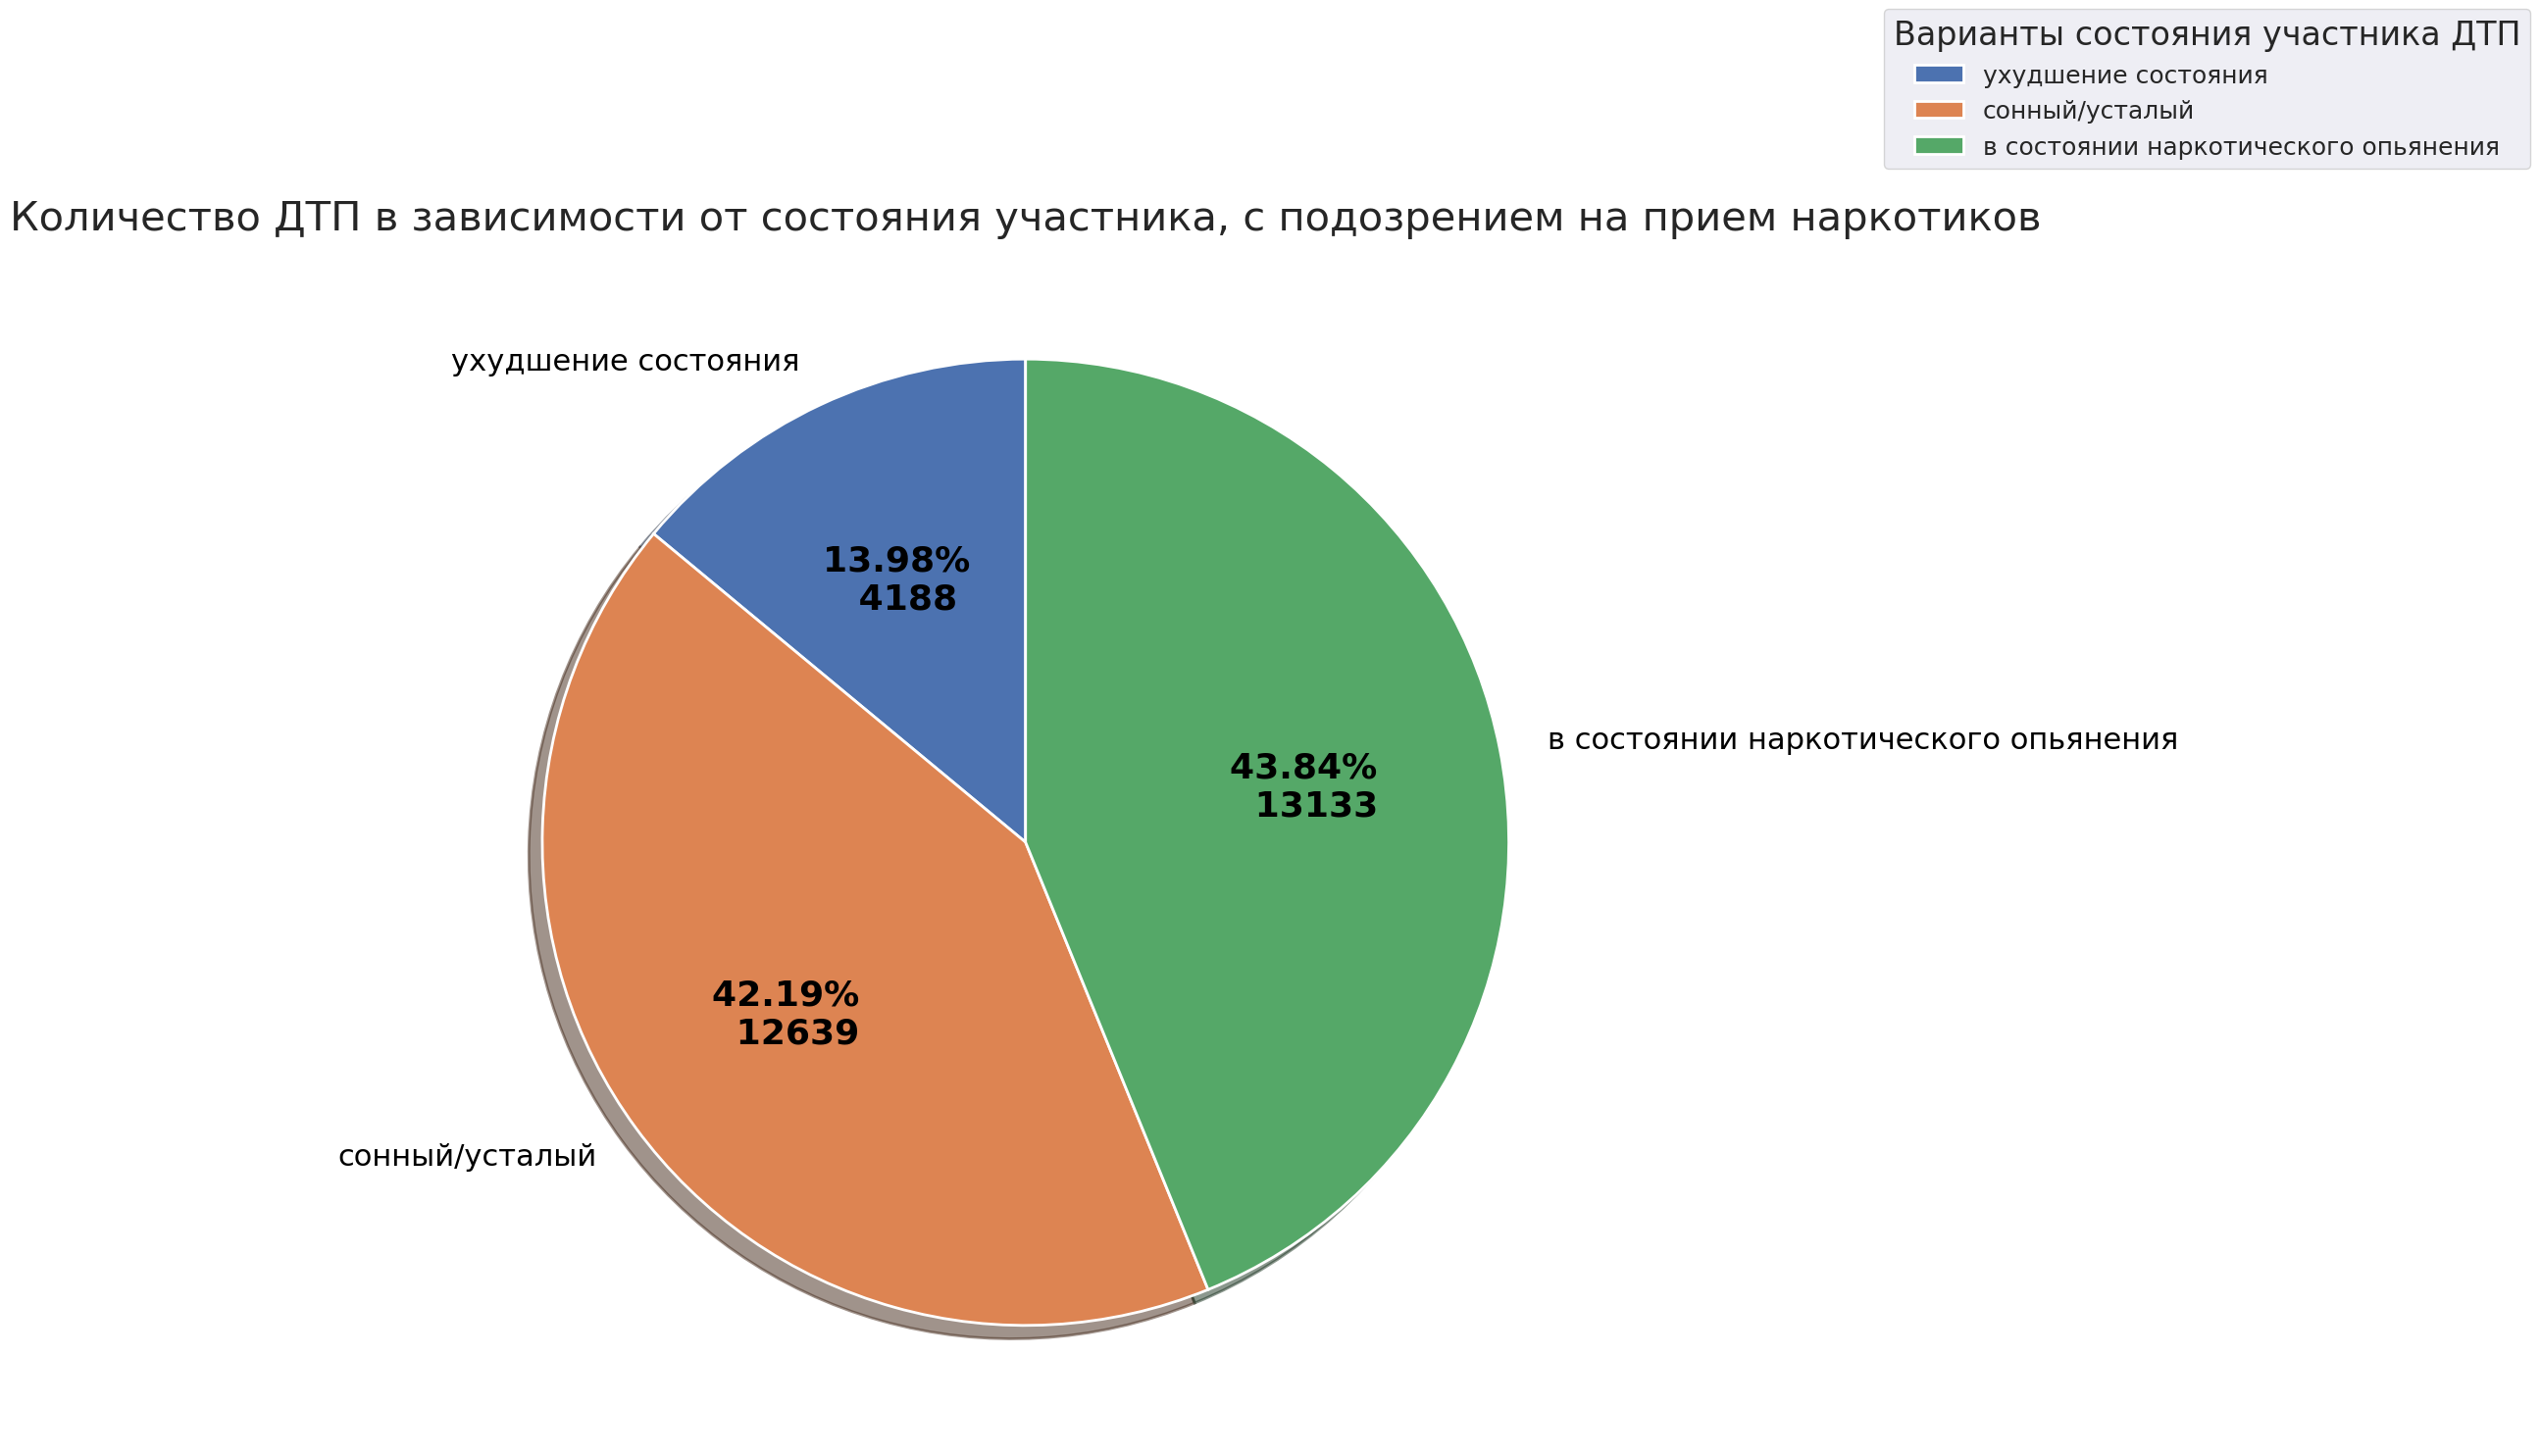

In [33]:
pie_drow(
    data["party_drug_physical"],
    data["total"],
    figsize=(20, 16),
    title_legend='Варианты состояния участника ДТП',
    title_legend_font_size=18,
    head_title=
    'Количество ДТП в зависимости от состояния участника, с подозрением на прием наркотиков',
    title_font_size=30,
    autotexts_font_size=26)

**Вывод.**

В данном запросе выведены только значения по трем параметрам `under drug influence` - в состоянии наркотического опьянения, `sleepy/fatigued` - сонный/усталый, `impairment - physical` - ухудшение состояния.

По сравнению с общим количеством уникальных ДТП, количество случаев нахождения в состоянии наркотического опьянения не велико.

### Количество ДТП по географическим районам (выбор 10 самых проблемных районов)

**SQL - запрос.**

In [34]:
query = '''
SELECT county_location,
       COUNT(case_id) AS total
FROM collisions
WHERE collision_date BETWEEN '2009-01-01' AND '2012-12-31'
GROUP BY county_location
ORDER BY COUNT(case_id) DESC 
LIMIT 10;
'''
data = pd.read_sql_query(query, con=engine)

data

,county_location,total
0,los angeles,433740
1,orange,118267
2,san bernardino,79361
3,san diego,78364
4,riverside,69303
5,alameda,64548
6,sacramento,56977
7,santa clara,50774
8,ventura,32330
9,contra costa,31487


**График.**

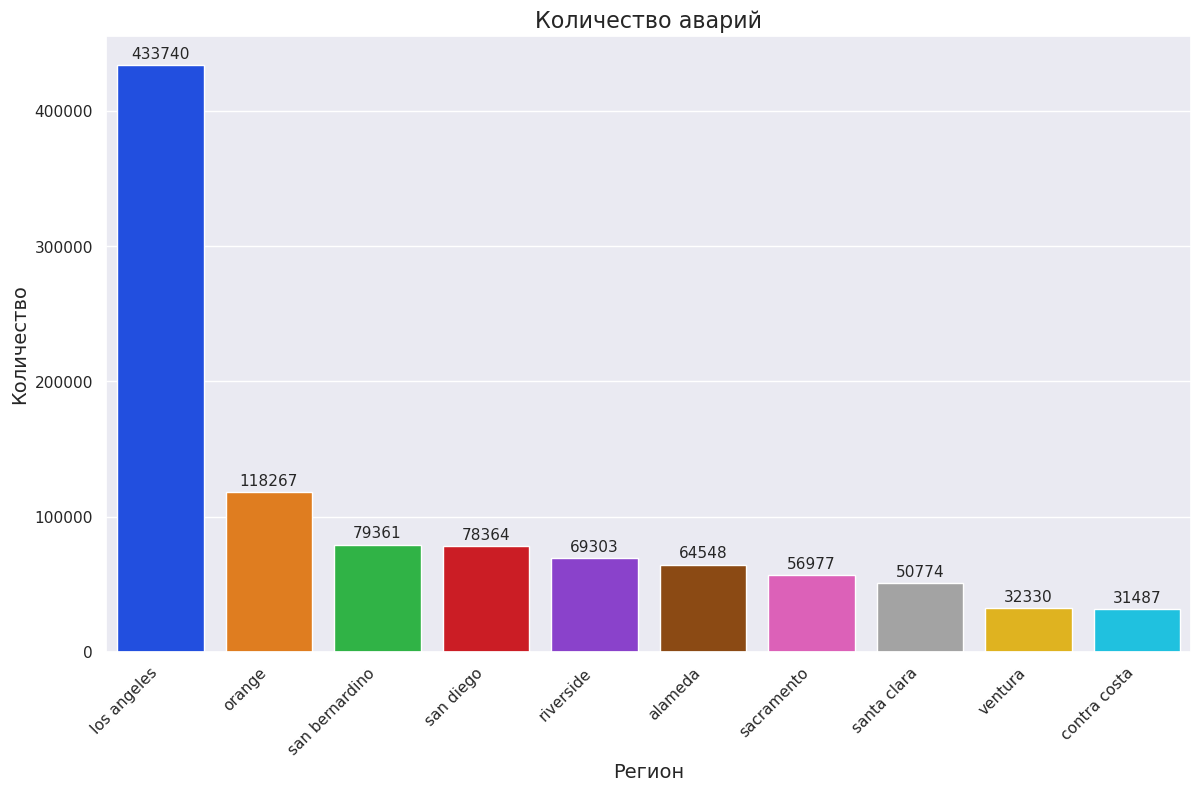

In [35]:
barplot_drow(data,
             data['county_location'],
             data['total'],
             figsize=(14, 8),
             font_xtick=11,
             size_annot=11,
             color_palette='bright',
             title_plot='Количество аварий',
             x_label='Регион',
             y_label='Количество',
             title_font_size=16,
             xlabel_font_size=14,
             ylabel_font_size=14)

**Вывод.**

Так как данные по Калифорнии, естественно наибольшее кол-во ДТП в Лос-Анджелесе. Хотя нет Сан-Франциско и Вегаса в топ-10 по ДТП.

### Влияние освещения на количество ДТП. 

**SQL - запрос.**

In [36]:
query = '''
SELECT CASE
        WHEN lighting = 'dark with no street lights' THEN 'темно - нет уличных фонарей'
        WHEN lighting = 'dark with street lights' THEN 'темно - уличные фонари'
        WHEN lighting = 'dark with street lights not functioning' THEN 'темно - уличные фонари не работают'
        WHEN lighting = 'daylight' THEN 'дневной свет'
        WHEN lighting = 'dusk or dawn' THEN 'сумерки - рассвет'
        ELSE 'не указано'
       END AS lighting,
       COUNT(case_id) AS total
FROM collisions
WHERE collision_date BETWEEN '2009-01-01' AND '2012-12-31'
GROUP BY lighting
ORDER BY total;
'''
data = pd.read_sql_query(query, con=engine)

data

,lighting,total
0,темно - уличные фонари не работают,4200
1,не указано,8593
2,сумерки - рассвет,47188
3,темно - нет уличных фонарей,106093
4,темно - уличные фонари,291793
5,дневной свет,941826


**График.**

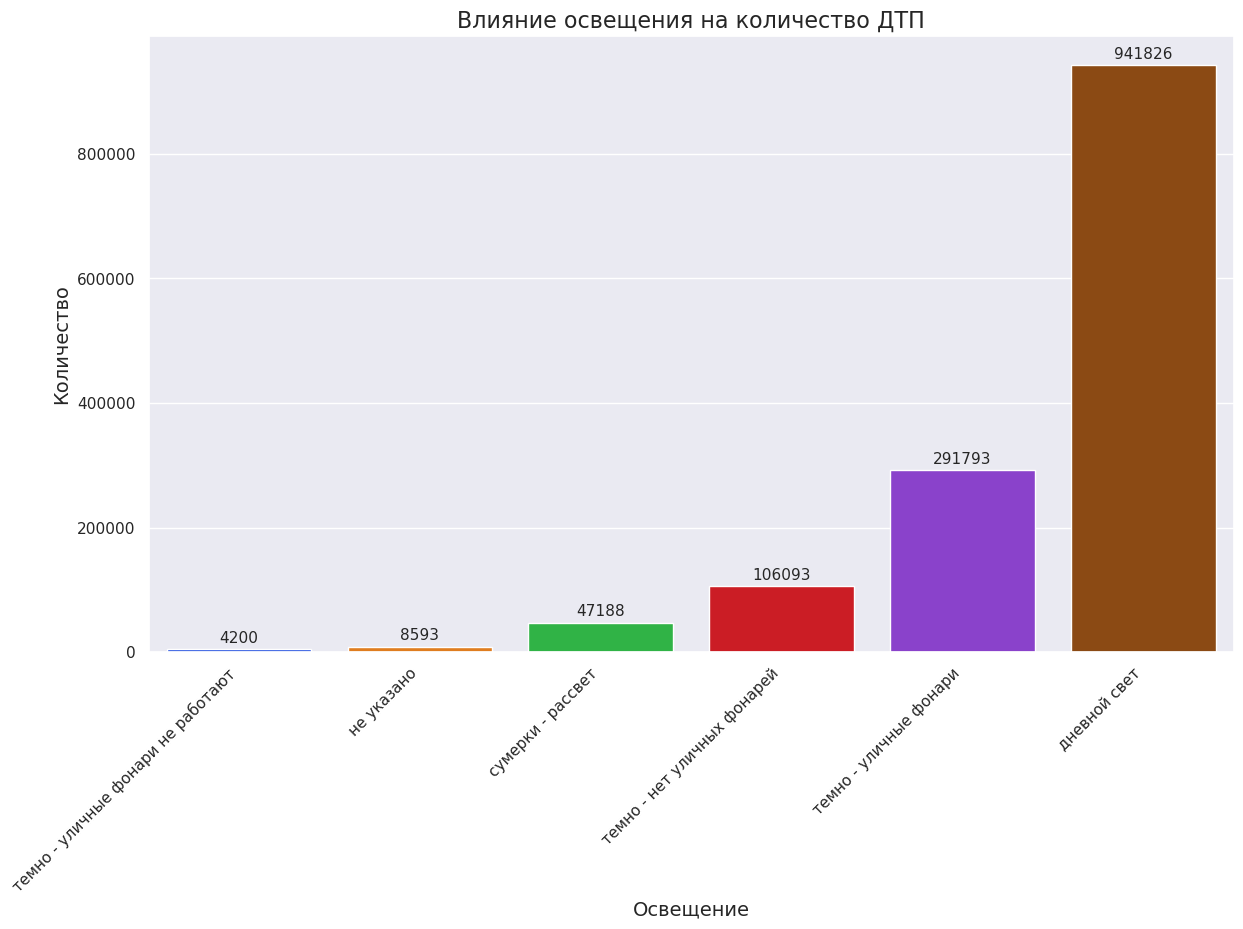

In [37]:
barplot_drow(data,
             data['lighting'],
             data['total'],
             figsize=(14, 8),
             font_xtick=11,
             size_annot=11,
             color_palette='bright',
             title_plot='Влияние освещения на количество ДТП',
             x_label='Освещение',
             y_label='Количество',
             title_font_size=16,
             xlabel_font_size=14,
             ylabel_font_size=14)

**Вывод.**

Большиство ДТП - днём. А далее всё-таки инстинкт самосохранения включается и в зависимости от количества света аварии идут на спад.

### Анализ количества ДТП  в зависимости от возможности разговаривать по громкой связи.

**SQL - запрос.**

In [38]:
query = '''
SELECT CASE 
        WHEN p.cellphone_in_use = 0 THEN 'нет громкой связи'
        WHEN p.cellphone_in_use = 1 THEN 'есть громкая связь'
        ELSE 'не указано'
       END AS cellphone_in_use,
       COUNT(ci.case_id) AS total
FROM case_ids AS ci
JOIN collisions AS c ON ci.case_id = c.case_id
JOIN parties AS p ON ci.case_id = p.case_id
WHERE c.collision_date BETWEEN '2009-01-01' AND '2012-12-31'
GROUP BY p.cellphone_in_use;
'''
data = pd.read_sql_query(query, con=engine)

data

,cellphone_in_use,total
0,нет громкой связи,2194465
1,есть громкая связь,45815
2,не указано,511548


**График.**

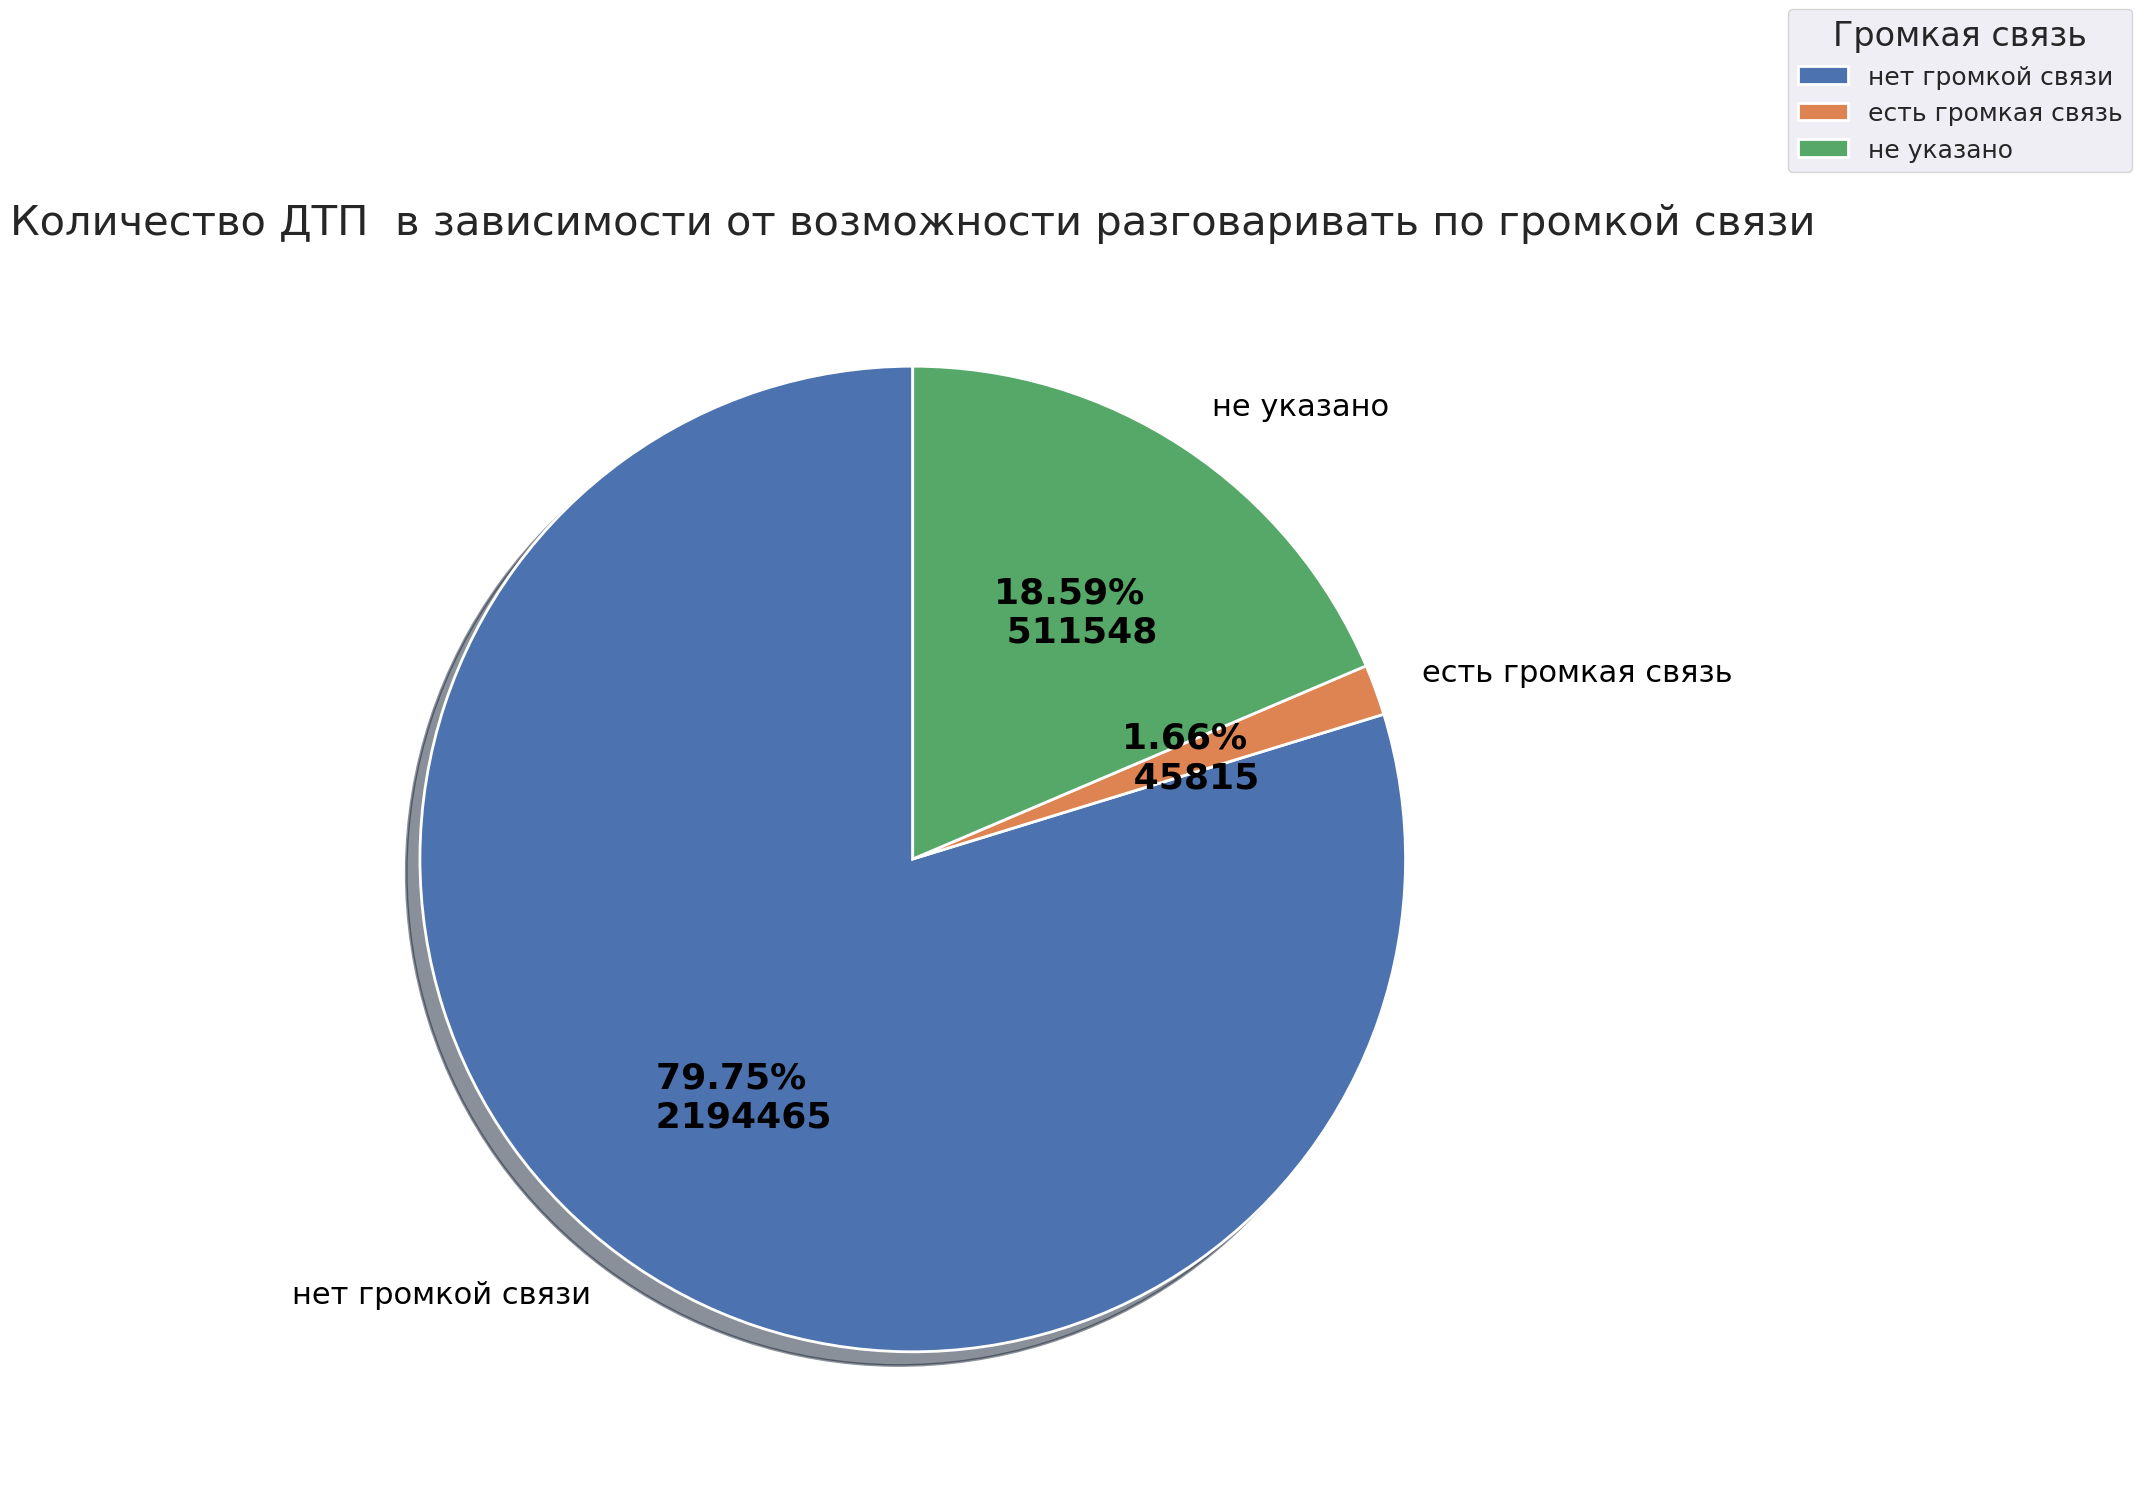

In [39]:
pie_drow(
    data["cellphone_in_use"],
    data["total"],
    figsize=(20, 16),
    title_legend='Громкая связь',
    title_legend_font_size=18,
    head_title=
    'Количество ДТП  в зависимости от возможности разговаривать по громкой связи',
    title_font_size=30,
    autotexts_font_size=26)

**Вывод.**

Тут самая прямая зависимость есть громкая связь - резкое снижение кол-ва ДТП.

### Анализ возраста автомобиля при условии виновности участника ДТП (Топ 10 по убыванию количества ДТП).

**SQL - запрос.**

In [40]:
query = '''
SELECT v.vehicle_age,
       COUNT(ci.case_id) AS total
FROM case_ids AS ci
JOIN collisions AS c ON ci.case_id = c.case_id
JOIN parties AS p ON ci.case_id = p.case_id
JOIN vehicles AS v ON ci.case_id = v.case_id
WHERE p.party_number = v.party_number 
  AND c.collision_date BETWEEN '2012-01-01' AND '2012-12-31'
  AND p.at_fault = 1
GROUP BY v.vehicle_age
ORDER BY total DESC, v.vehicle_age
LIMIT 10;
'''

data = pd.read_sql_query(query, con=engine)
data = data.sort_values(by='vehicle_age')

data

,vehicle_age,total
8,0,2009
9,1,1966
2,2,6029
0,3,11245
1,4,6536
3,5,4670
4,6,3374
5,7,3356
6,8,3113
7,9,2482


**График.**

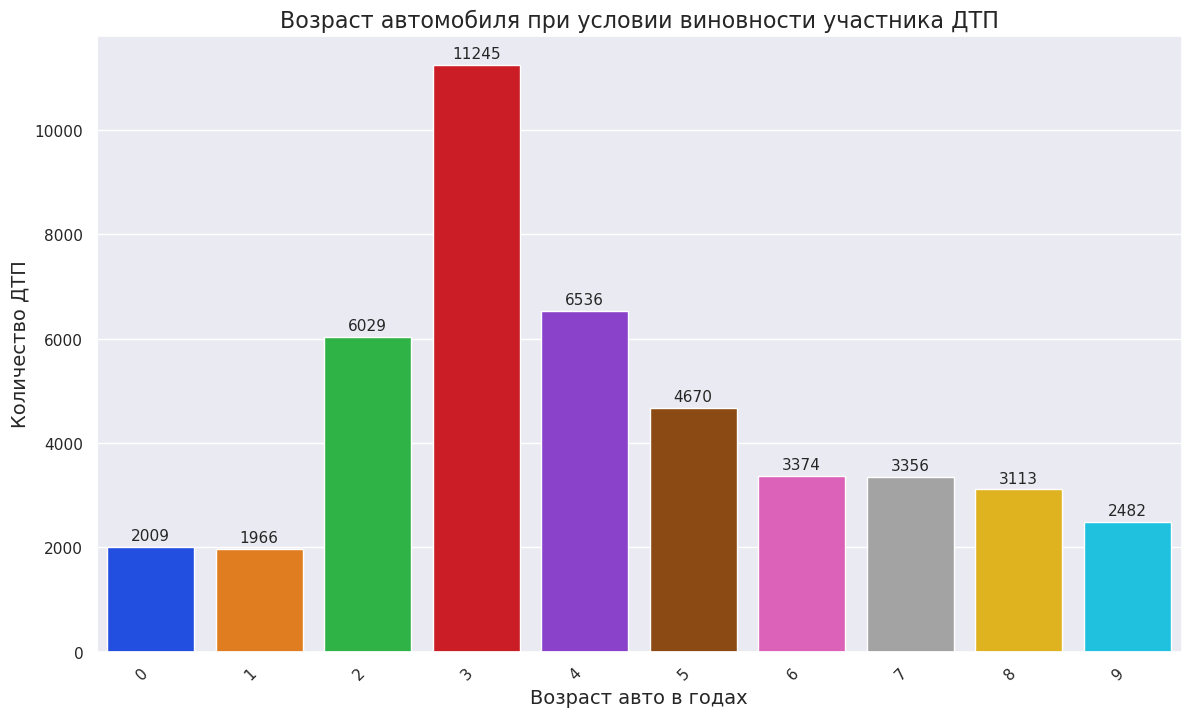

In [41]:
barplot_drow(data,
             data['vehicle_age'],
             data['total'],
             figsize=(14, 8),
             font_xtick=11,
             size_annot=11,
             color_palette='bright',
             title_plot='Возраст автомобиля при условии виновности участника ДТП',
             x_label='Возраст авто в годах',
             y_label='Количество ДТП',
             title_font_size=16,
             xlabel_font_size=14,
             ylabel_font_size=14)

**Вывод.**

Максимум у трехлетних авто.

Если брать личное авто, то тогда распределение можно понять. Первые пару лет машину берегут. Далее многие меняют авто каждые три года и появляется некоторая халатность. А вот те кто не меняет с увеличением возраста авто и возможно отсутвием мат. возможности поменять авто - начинают более бережно относиться к машине.

По прокатным авто связь проследить не получается. Возможно техническое состояние. Возможно маленькая страховка...

### Анализ количества ДТП в зависимости от типа второго участника.

**SQL - запрос.**

In [42]:
query = '''
SELECT CASE 
        WHEN p.party_type = 'road signs' THEN 'дорожные знаки'
        WHEN p.party_type = 'car' THEN 'машина'
        WHEN p.party_type = 'road bumper' THEN 'отбойник'
        WHEN p.party_type = 'building' THEN 'строения'
        WHEN p.party_type = 'other' THEN 'другое'
        ELSE 'не указано'
       END AS party_type,
       COUNT(ci.case_id) AS total
FROM case_ids AS ci
JOIN collisions AS c ON ci.case_id = c.case_id
JOIN parties AS p ON ci.case_id = p.case_id
WHERE c.collision_date BETWEEN '2009-01-01' AND '2012-12-31'
GROUP BY party_type;
'''

data = pd.read_sql_query(query, con=engine)

data

,party_type,total
0,строения,48638
1,машина,2468878
2,другое,8876
3,отбойник,173457
4,дорожные знаки,48357
5,не указано,3622


**График.**

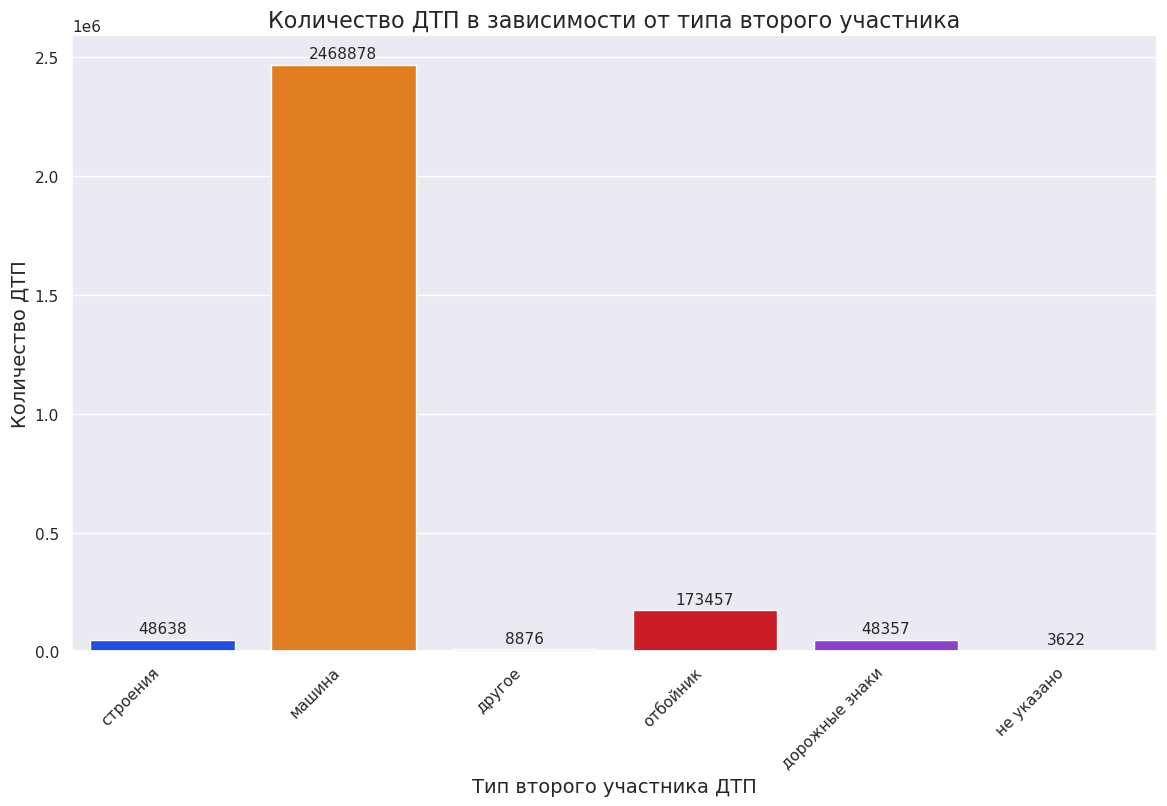

In [43]:
barplot_drow(data,
             data['party_type'],
             data['total'],
             figsize=(14, 8),
             font_xtick=11,
             size_annot=11,
             color_palette='bright',
             title_plot='Количество ДТП в зависимости от типа второго участника',
             x_label='Тип второго участника ДТП',
             y_label='Количество ДТП',
             title_font_size=16,
             xlabel_font_size=14,
             ylabel_font_size=14)

**Вывод.** 

Большинство естественно у ДТП между машинами. А далее стандартные отбойники, строения и пр. препятствия. 

## Создание модели для оценки водительского риска

### Первичный отбор факторов, необходимых для модели.

В сводной таблице будут включены признаки из разных таблиц, которые могут повлиять на виновность участника в ДТП.

Таблица **`collisions`**:

**`county_city_location`**: номер географических районов, где произошло ДТП. Влияет на возможность виносвности в ДТП, т.к. траффик в городах разных, что может существенно повысить риск ДТП. **Добавляем в датасет**.

**`county_location`**: названия географических районов, где произошло ДТП. Аналогично. **Добавляем в датасет**.

**`distance`**: расстояние от главной дороги (метры). Может влиять. **Добавляем в датасет**.

**`direction`**: направление движения. Не влияет на возможность ДТП и виновности в ДТП. **Не включаем в датасет**.

**`intersection`**: является ли место происшествие перекрёстком. Уже свершившийся факт ДТП. **Не включаем в датасет**.

**`weather_1`**: погода. Влияет. **Добавляем в датасет**.

**`location_type`**: тип дороги. Может влиять. **Добавляем в датасет**. 

**`collision_damage`**: серьёзность происшествия. Уже свершившийся факт ДТП. **Не включаем в датасет**.

**`party_count`**: количество участников. Уже свершившийся факт ДТП. **Не включаем в датасет**.

**`primary_collision_factor`**: основной фактор аварии. Может влиять на виновность в ДТП. **Добавляем в датасет**.

**`pcf_violation_category`**: категория нарушения. Влияет на виновность в ДТП.  **Добавляем в датасет**.

**`type_of_collision`**: тип аварии. Уже свершившийся факт ДТП. **Не включаем в датасет**.

**`motor_vehicle_involved_with`**: дополнительные участники ДТП. Уже свершившийся факт ДТП. **Не включаем в датасет**.

**`road_surface`**: состояние дороги. Влияет. **Добавляем в датасет**.

**`road_condition_1`**: дорожное состояние (ремонт и т.п.). Влияет. **Добавляем в датасет**.

**`lighting`**: освещение. Влияет. **Добавляем в датасет**.

**`control_device`**: устройство управления. Влияет. **Добавляем в датасет**.

**`collision_date`**: дата происшествия. Может влиять, но данные по 2012 году не полные, поэтому **Не включаем в датасет**.

**`collision_time`**: время происшествия. Аналогично **Не включаем в датасет**.

Таблица **`parties`**:

**`party_number`**: номер участника происшествия. Уже свершившийся факт ДТП. **Не включаем в датасет**.

**`party_type`**: тип участника происшествия. Уже свершившийся факт ДТП. **Не включаем в датасет**.

**`at_fault`**: виновность участника. Целевой признак. **Добавляем в датасет**.

**`insurance_premium`**: сумма страховки (тыс. USD). Может влиять. **Добавляем в датасет**. 

**`party_sobriety`**: состояние участника: физическое или с учётом принятых лекарств. Влияет. **Добавляем в датасет**.

**`party_drug_physical`**: трезвость (по наркотикам) участника. Влияет. **Добавляем в датасет**.

**`cellphone_in_use`**: наличие телефона в автомобиле (возможности разговаривать по громкой связи). Влияет. **Добавляем в датасет**.

Таблица **`vehicles`**:

**`party_number`**: номер участника происшествия. Уже свершившийся факт ДТП. **Не включаем в датасет**.

**`vehicle_type`**: тип кузова. Может влиять. Все зависит от опыта водителя. **Добавляем в датасет**.  

**`vehicle_transmission`**: тип КПП. Может влиять. Все зависит от опыта водителя. **Добавляем в датасет**. 

**`vehicle_age`**: возраст автомобиля (в годах). Может влиять. **Добавляем в датасет**. 


Результирующая таблица признаков для датасета:


|       Признак            |   Описание                                         |    Таблица |
|--------------------------|----------------------------------------------------|------------|
|`county_city_location`    |Номер географических районов, где произошло ДТП     |`collisions`| 
|`county_location`         |Названия географических районов, где произошло ДТП  |`collisions`|
|`distance`                |Расстояние от главной дороги (метры).               |`collisions`|
|`weather_1`               |Погода                                              |`collisions`|
|`location_type`           |Тип дороги                                          |`collisions`|
|`primary_collision_factor`|Основной фактор аварии                              |`collisions`|
|`pcf_violation_category`  |Категория нарушения                                 |`collisions`|
|`road_surface`            |Состояние дороги                                    |`collisions`|
|`road_condition_1`        |Дорожное состояние (ремонт и т.п.)                  |`collisions`|
|`lighting`                |Освещение                                           |`collisions`|
|`control_device`          |Устройство управления                               |`collisions`|
|__________________________|____________________________________________________|____________|
|`at_fault`                |Виновность участника. **Целевой признак**           |`parties`   |
|`insurance_premium`       |Сумма страховки (тыс. USD)                          |`parties`   |
|`party_sobriety`          |Состояние: физическое или с учётом принятых лекарств|`parties`   |
|`party_drug_physical`     |Трезвость (по наркотикам) участника                 |`parties`   |
|`cellphone_in_use`        |Возможность разговаривать по громкой связи          |`parties`   |
|__________________________|____________________________________________________|____________|
|`vehicle_type`            |Тип кузова                                          |`vehicles`  |
|`vehicle_transmission`    |Тип КПП                                             |`vehicles`  |
|`vehicle_age`             |Возраст автомобиля (в годах)                        |`vehicles`  |
|__________________________|____________________________________________________|____________|

### Создание датасета.

Датасет буден создан согласно условиям заказчки при помощи SQL-запроса.

- Тип виновника — только машина (`car`).
- Cлучаи, когда ДТП привело к любым значимым повреждениям автомобиля любого из участников — все, кроме типа SCRATCH (царапина).
- Для моделирования берутся данные только за 2012 год.

In [44]:
query_final = '''
SELECT c.county_location,
       c.county_city_location,
       c.weather_1 AS weather,
       c.location_type,
       c.distance,
       c.primary_collision_factor,
       c.pcf_violation_category,
       c.road_surface,
       c.road_condition_1 AS road_condition,
       c.lighting,
       c.control_device,
       p.insurance_premium,
       p.party_sobriety,
       p.party_drug_physical,
       p.cellphone_in_use,
       v.vehicle_type, 
       v.vehicle_transmission, 
       v.vehicle_age,
       p.at_fault       
FROM case_ids AS ci
JOIN collisions AS c ON ci.case_id = c.case_id
JOIN parties AS p ON ci.case_id = p.case_id
JOIN vehicles AS v ON ci.case_id = v.case_id
WHERE p.party_number = v.party_number 
   AND p.party_type = 'car'
   AND c.collision_damage !='scratch'
   AND c.collision_date BETWEEN '2012-01-01' AND '2012-12-31'
ORDER BY ci.case_id;
'''

data_final = pd.read_sql_query(query_final, con=engine)

In [45]:
data_final.head()

,county_location,county_city_location,weather,location_type,distance,primary_collision_factor,pcf_violation_category,road_surface,road_condition,lighting,control_device,insurance_premium,party_sobriety,party_drug_physical,cellphone_in_use,vehicle_type,vehicle_transmission,vehicle_age,at_fault
0,san diego,3712,cloudy,None,0.0,vehicle code violation,automobile right of way,dry,other,daylight,none,42.0,had not been drinking,None,0.0,sedan,auto,2.0,0
1,sacramento,3404,clear,None,0.0,vehicle code violation,speeding,dry,normal,daylight,none,31.0,had not been drinking,None,0.0,sedan,auto,5.0,0
2,sacramento,3400,clear,None,0.0,unknown,unknown,dry,normal,daylight,functioning,21.0,had not been drinking,None,0.0,sedan,auto,1.0,0
3,san bernardino,3607,clear,None,5.0,vehicle code violation,improper turning,dry,normal,dark with street lights,functioning,31.0,had not been drinking,None,0.0,sedan,auto,4.0,0
4,sacramento,3400,clear,None,0.0,vehicle code violation,other hazardous violation,dry,normal,daylight,functioning,49.0,had not been drinking,None,0.0,coupe,auto,6.0,1


**Датасет создан**.

### Предобработка данных и исследовательский анализ.

#### Предобработка данных.

**Пропуски в данных, оптимизация типов данных и размера датасета**

In [46]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56248 entries, 0 to 56247
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   county_location           56248 non-null  object 
 1   county_city_location      56248 non-null  object 
 2   weather                   56080 non-null  object 
 3   location_type             25932 non-null  object 
 4   distance                  56248 non-null  float64
 5   primary_collision_factor  56137 non-null  object 
 6   pcf_violation_category    55482 non-null  object 
 7   road_surface              55900 non-null  object 
 8   road_condition            55999 non-null  object 
 9   lighting                  56094 non-null  object 
 10  control_device            56033 non-null  object 
 11  insurance_premium         55701 non-null  float64
 12  party_sobriety            55376 non-null  object 
 13  party_drug_physical       2857 non-null   object 
 14  cellph

In [47]:
data_final.isna().sum()

county_location                 0
county_city_location            0
weather                       168
location_type               30316
distance                        0
primary_collision_factor      111
pcf_violation_category        766
road_surface                  348
road_condition                249
lighting                      154
control_device                215
insurance_premium             547
party_sobriety                872
party_drug_physical         53391
cellphone_in_use             4471
vehicle_type                    0
vehicle_transmission          859
vehicle_age                  1694
at_fault                        0
dtype: int64

Столбец **`county_city_location`** цифровой. Значения варьируются от 100 до 6000. Можно присвоить тип `uint16`.

In [48]:
data_final['county_city_location'] = data_final['county_city_location'].astype('uint16')

Большинство столбцов включая `cellphone_in_use` категориальные. Пропусков в них достаточно. Данные пропуски согласно описанию можно заменить значением `not stated`.

Переводим тип столбцов в категориальный и заменим пропуски.

In [49]:
cat_columns = data_final.select_dtypes('object').columns.tolist()
cat_columns.append('cellphone_in_use')

In [50]:
data_final[cat_columns] = data_final[cat_columns].fillna('not stated')
data_final[cat_columns] = data_final[cat_columns].astype('category')

Остались пропуски в количественных столбцах.

Столбец **`distance`** 

In [51]:
data_final['distance'].describe()

count    5.624800e+04
mean     8.594387e+02
std      7.240295e+03
min      0.000000e+00
25%      7.000000e+00
50%      1.350000e+02
75%      5.450000e+02
max      1.584000e+06
Name: distance, dtype: float64

75% - квантиль это 545 метров. Проверим сколько и какие значения больше этого порога. 

In [52]:
data_final.loc[data_final['distance'] > 545, 'distance'].value_counts()

distance
1056.0    1451
1584.0    1126
2640.0    1066
1000.0     686
2112.0     671
          ... 
2021.0       1
1274.0       1
1826.0       1
4894.0       1
7757.0       1
Name: count, Length: 1273, dtype: int64

In [53]:
display(data_final.loc[data_final['distance'] > 545].head())

,county_location,county_city_location,weather,location_type,distance,primary_collision_factor,pcf_violation_category,road_surface,road_condition,lighting,control_device,insurance_premium,party_sobriety,party_drug_physical,cellphone_in_use,vehicle_type,vehicle_transmission,vehicle_age,at_fault
8,kern,1500,clear,highway,550.0,vehicle code violation,dui,dry,normal,dusk or dawn,none,21.0,"had been drinking, under influence",not stated,0.0,sedan,manual,3.0,1
10,riverside,3300,clear,highway,8976.0,vehicle code violation,improper turning,dry,normal,dark with no street lights,none,26.0,"had been drinking, under influence",under drug influence,0.0,coupe,manual,4.0,1
13,san bernardino,3600,clear,highway,2479.0,vehicle code violation,improper turning,dry,normal,daylight,none,58.0,had not been drinking,not stated,0.0,coupe,manual,9.0,1
28,san diego,3711,clear,ramp,742.0,vehicle code violation,pedestrian violation,dry,normal,dark with street lights,none,56.0,had not been drinking,not stated,0.0,sedan,auto,4.0,0
33,san bernardino,3600,clear,highway,1320.0,vehicle code violation,wrong side of road,dry,normal,dusk or dawn,none,74.0,had not been drinking,not stated,not stated,coupe,manual,11.0,1


In [54]:
display(data_final.loc[(data_final['distance'] > 545) & (data_final['county_location'] == 'los angeles')].head())

,county_location,county_city_location,weather,location_type,distance,primary_collision_factor,pcf_violation_category,road_surface,road_condition,lighting,control_device,insurance_premium,party_sobriety,party_drug_physical,cellphone_in_use,vehicle_type,vehicle_transmission,vehicle_age,at_fault
88,los angeles,1942,clear,not stated,1500.0,vehicle code violation,speeding,dry,normal,dark with street lights,not stated,25.0,"had been drinking, under influence",under drug influence,0.0,coupe,manual,4.0,1
120,los angeles,1942,clear,not stated,549.0,vehicle code violation,pedestrian violation,dry,normal,dark with street lights,functioning,52.0,"had been drinking, under influence",not stated,0.0,sedan,manual,4.0,0
142,los angeles,1900,clear,not stated,1079.0,vehicle code violation,improper passing,dry,normal,daylight,none,37.0,impairment unknown,G,0.0,coupe,manual,5.0,1
143,los angeles,1900,clear,not stated,1079.0,vehicle code violation,improper passing,dry,normal,daylight,none,53.0,had not been drinking,not stated,0.0,sedan,manual,3.0,0
145,los angeles,1985,clear,highway,2534.0,vehicle code violation,improper turning,dry,normal,daylight,none,50.0,had not been drinking,not stated,0.0,coupe,manual,8.0,0


Что в Калифорнии подразумевается под расстоянием до главной дороги не понятно.. Может расстояние до Route 66 или какой-нибудь номерной Iinterstate.... 

Даже есть сравнить с движением в РФ, то главных дорог может быть много... 

Если допустить, что ДТП произошло на грунтовке, то удаление от главной асфальтовой дороги может быть и 1 км и более..

Но в там система исчисления другая и этого могут быть дюймы. К примеру 1500 перевести в метры это 3.81 метра.

Становится правдоподобнее. Но менять ничего не будем, т.к. новые значения все равно будут выведены из текущего..

Поэтому оставим как есть. Заменим только аномалию в 1584000 медианой.

In [55]:
data_final.loc[data_final['distance'] == data_final['distance'].max(),
               'distance'] = data_final['distance'].median()

In [56]:
data_final['distance'] = data_final['distance'].astype('uint32')

Столбец **`insurance_premium`**.

In [57]:
data_final['insurance_premium'].describe()

count    55701.000000
mean        37.607170
std         16.328721
min          0.000000
25%         24.000000
50%         34.000000
75%         49.000000
max        105.000000
Name: insurance_premium, dtype: float64

Пропусков 547. Менее 1 процента. Можно заменить медианным значением.

In [58]:
data_final['insurance_premium'] = data_final['insurance_premium'].fillna(
    data_final['insurance_premium'].median())

Столбец **`vehicle_age`**.

In [59]:
data_final['vehicle_age'].describe()

count    54554.000000
mean         4.856472
std          3.234503
min          0.000000
25%          3.000000
50%          4.000000
75%          7.000000
max        161.000000
Name: vehicle_age, dtype: float64

Пропусков 1694. Около 3-х процентов. Можно заменить медианным значением. Плюс есть аномалия в 161 год. Это скорее всего опечатка. Можно заменить на 16 лет.

In [60]:
data_final['vehicle_age'] = data_final['vehicle_age'].fillna(
    data_final['vehicle_age'].median())

data_final.loc[data_final['vehicle_age'] == 161, 'vehicle_age'] = 16

Т.к. все значения количественных перменных лежат в диапазоне от 0 до 255 и страховки все целые, то можно оптимизировать тип как `uint8`.

In [61]:
data_final[['insurance_premium', 'vehicle_age', 'at_fault'
            ]] = data_final[['insurance_premium', 'vehicle_age',
                             'at_fault']].astype('uint8')

In [62]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56248 entries, 0 to 56247
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   county_location           56248 non-null  category
 1   county_city_location      56248 non-null  uint16  
 2   weather                   56248 non-null  category
 3   location_type             56248 non-null  category
 4   distance                  56248 non-null  uint32  
 5   primary_collision_factor  56248 non-null  category
 6   pcf_violation_category    56248 non-null  category
 7   road_surface              56248 non-null  category
 8   road_condition            56248 non-null  category
 9   lighting                  56248 non-null  category
 10  control_device            56248 non-null  category
 11  insurance_premium         56248 non-null  uint8   
 12  party_sobriety            56248 non-null  category
 13  party_drug_physical       56248 non-null  cate

**Данные обработаны, пропуски удалены, типы и размер датасета оптимизированы.**

Как бонус можно русифицировать датасет для удобства.

Словарь словарей для русификации датасета.

In [63]:
rus_dict = {
    'county_location': {
        'los angeles': 'Лос-Анджелес',
        'orange': 'Ориндж',
        'san diego': 'Сан-Диего',
        'san bernardino': 'Сан-Бернардино',
        'riverside': 'Риверсайд',
        'sacramento': 'Сакраменто',
        'alameda': 'Аламида',
        'santa clara': 'Санта-Клара',
        'ventura': 'Вентура',
        'kern': 'Керн',
        'fresno': 'Фресно',
        'contra costa': 'Контра-Коста',
        'san mateo': 'Сан-Матео',
        'san joaquin': 'Сан-Хоакин',
        'stanislaus': 'Станисло',
        'santa barbara': 'Санта-Барбара',
        'tulare': 'Туларе',
        'sonoma': 'Сонома',
        'placer': 'Плейсер',
        'monterey': 'Монтерей',
        'solano': 'Солано',
        'san francisco': 'Сан-Франциско',
        'san luis obispo': 'Сан-Луис-Обиспо',
        'santa cruz': 'Санта-Круз',
        'merced': 'Мерсед',
        'marin': 'Марин',
        'humboldt': 'Гумбольдт',
        'madera': 'Мадера',
        'butte': 'Бьютт',
        'el dorado': 'Эль-Дорадо',
        'shasta': 'Шаста',
        'yolo': 'Йоло',
        'kings': 'Кингс-Сити',
        'napa': 'Напа',
        'imperial': 'Империал',
        'mendocino': 'Мендосино',
        'nevada': 'Невада-Сити',
        'tehama': 'Техейма',
        'sutter': 'Саттер',
        'tuolumne': 'Туолумне-Сити',
        'lake': 'Лейк',
        'calaveras': 'Калаверас',
        'yuba': 'Юба-Сити',
        'siskiyou': 'Сискию',
        'amador': 'Амадор-Сити',
        'san benito': 'Сан-Бенито',
        'inyo': 'Иньо',
        'colusa': 'Колуса',
        'mariposa': 'Марипоса',
        'del norte': 'Дел-Норт',
        'lassen': 'Лассен',
        'mono': 'Моно',
        'glenn': 'Гленн',
        'plumas': 'Плумас',
        'trinity': 'Тринити',
        'alpine': 'Алпайн',
        'modoc': 'Модок',
        'sierra': 'Сьерра-Сити'
    },
    'weather': {
        'cloudy': 'облачно',
        'clear': 'ясно',
        'raining': 'дождь',
        'not stated': 'не указано',
        'fog': 'туман',
        'snowing': 'снегопад',
        'other': 'другое',
        'wind': 'ветер'
    },
    'location_type': {
        'highway': 'шоссе',
        'not stated': 'не указано',
        'ramp': 'рампа',
        'intersection': 'перекрёсток'
    },
    'primary_collision_factor': {
        'vehicle code violation': 'нарушение правил ПДД',
        'not stated': 'не указано',
        'unknown': 'неизвестно',
        'other improper driving': 'другое неправильное вождение',
        'other than driver': 'кроме водителя',
        'fell asleep': 'заснул'
    },
    'pcf_violation_category': {
        'unsafe lane change': 'небезопасная смена полосы движения',
        'improper passing': 'неправильное движение',
        'improper turning': 'неправильный поворот',
        'automobile right of way': 'помеха справа',
        'speeding': 'превышение скорости',
        'not stated': 'не указано',
        'dui': 'нарушение пешехода',
        'traffic signals and signs': 'дорожные сигналы и знаки',
        'wrong side of road': 'неправильная сторона дороги (встречка)',
        'unknown': 'неизвестно',
        'following too closely': 'опасное сближение',
        'other hazardous violation': 'другие нарушения',
        'unsafe starting or backing': 'опасный старт',
        'other improper driving': 'другое неправильное вождение',
        'pedestrian right of way': 'приоритет для пешеходов',
        'hazardous parking': 'неправильная парковка',
        'other than driver (or pedestrian)': 'кроме водителя или пешехода',
        'fell asleep': 'заснул',
        'pedestrian violation': 'нарушение пешеходами',
        'other equipment': 'другое оборудование',
        'lights': 'освещение',
        'impeding traffic': 'препятствие движению транспорта',
        'brakes': 'тормоза',
        'pedestrian dui': 'нарушение пешехода'
    },
    'road_surface': {
        'wet': 'мокрая',
        'dry': 'сухая',
        'slippery': 'скользкая, грязная, маслянистая и т. д.',
        'snowy': 'заснеженная или обледенелая',
        'not stated': 'не указано'
    },
    'road_condition': {
        'normal': 'нет ничего необычного',
        'not stated': 'не указано',
        'construction': 'зона строительства или ремонта',
        'obstruction': 'препятствие на проезжей части',
        'holes': 'ямы, глубокая колея',
        'loose material': 'сыпучий материал на проезжей части',
        'other': 'другое',
        'flooded': 'затоплено',
        'reduced width': 'уменьшенная ширина проезжей части'
    },
    'lighting': {
        'daylight':
        'дневной свет',
        'dark with street lights':
        'темно - уличные фонари',
        'dusk or dawn':
        'сумерки - рассвет',
        'not stated':
        'не указано',
        'dark with no street lights':
        'темно - нет уличных фонарей',
        'dark with street lights not functioning':
        'темно - уличные фонари не работают'
    },
    'control_device': {
        'none': 'не указано',
        'functioning': 'функционирует',
        'not functioning': 'не функционирует',
        'obscured': 'затемнённый;',
        'not stated': 'нет'
    },
    'party_sobriety': {
        'had not been drinking': 'не пил',
        'not applicable': 'не оценивался',
        'impairment unknown': 'неизвестное ухудшение',
        'not stated': 'не указано',
        'had been drinking, not under influence':
        'был пьян, не находился под влиянием',
        'had been drinking, under influence': 'был пьян, под влиянием',
        'had been drinking, impairment unknown':
        'был пьян, нарушения неизвестны'
    },
    'party_drug_physical': {
        'not applicable': 'не оценивался',
        'G': 'не известно',
        'under drug influence': 'в состоянии наркотического опьянения',
        'sleepy/fatigued': 'сонный/усталый',
        'impairment - physical': 'ухудшение состояния',
        'not stated': 'не указано'
    },
    'cellphone_in_use': {
        1: 'есть',
        0: 'нет',
        'not stated': 'не указано'
    },
    'vehicle_type': {
        'sedan': 'седан',
        'hatchback': 'хэтчбэк',
        'coupe': 'купе',
        'minivan': 'минивэн',
        'other': 'другое'
    },
    'vehicle_transmission': {
        'manual': 'ручная',
        'auto': 'автомат',
        'not stated': 'не указано'
    },
}

In [64]:
for column, column_translate in rus_dict.items():
    data_final[column] = data_final[column].map(column_translate)

In [65]:
data_final.head()

,county_location,county_city_location,weather,location_type,distance,primary_collision_factor,pcf_violation_category,road_surface,road_condition,lighting,control_device,insurance_premium,party_sobriety,party_drug_physical,cellphone_in_use,vehicle_type,vehicle_transmission,vehicle_age,at_fault
0,Сан-Диего,3712,облачно,не указано,0,нарушение правил ПДД,помеха справа,сухая,другое,дневной свет,не указано,42,не пил,не указано,нет,седан,автомат,2,0
1,Сакраменто,3404,ясно,не указано,0,нарушение правил ПДД,превышение скорости,сухая,нет ничего необычного,дневной свет,не указано,31,не пил,не указано,нет,седан,автомат,5,0
2,Сакраменто,3400,ясно,не указано,0,неизвестно,неизвестно,сухая,нет ничего необычного,дневной свет,функционирует,21,не пил,не указано,нет,седан,автомат,1,0
3,Сан-Бернардино,3607,ясно,не указано,5,нарушение правил ПДД,неправильный поворот,сухая,нет ничего необычного,темно - уличные фонари,функционирует,31,не пил,не указано,нет,седан,автомат,4,0
4,Сакраменто,3400,ясно,не указано,0,нарушение правил ПДД,другие нарушения,сухая,нет ничего необычного,дневной свет,функционирует,49,не пил,не указано,нет,купе,автомат,6,1


**Датасет русифицирован.**

#### Исследовательский анализ.

**Небольшой анализ категориальных переменных**.

Ниже будет проанализирована количество случаев, когда установлена виновность в ДТП и нет, в зависимости от категории переменной.

Столбец **`weather`** - погодные условия.

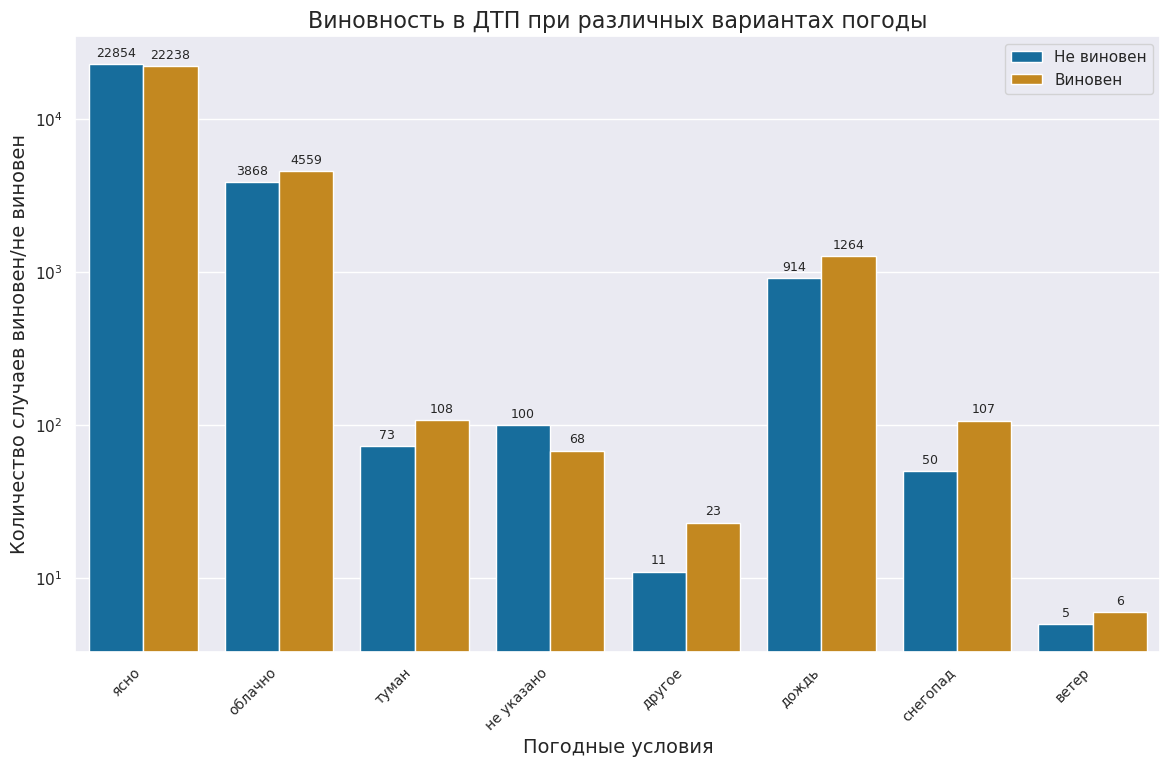

In [66]:
countplot_drow(data_final,
               x_ax='weather',
               hue='at_fault',
               yscale=True,
               figsize=(14, 8),
               font_xtick=10,
               size_annot=9,
               color_palette='colorblind',
               title_plot='Виновность в ДТП при различных вариантах погоды',
               x_label='Погодные условия',
               y_label='Количество случаев виновен/не виновен',
               title_font_size=16,
               xlabel_font_size=14,
               ylabel_font_size=14,
               hue_legend_list = ['Не виновен', 'Виновен'])

Количество аварий снижается в зависимости от погодных условий, виноватых где-то больше, где-то меньше. Все зависит от количества участников, возможности квалификации как обоюдного нарушения.

Столбец **`location_type`** - тип дороги.

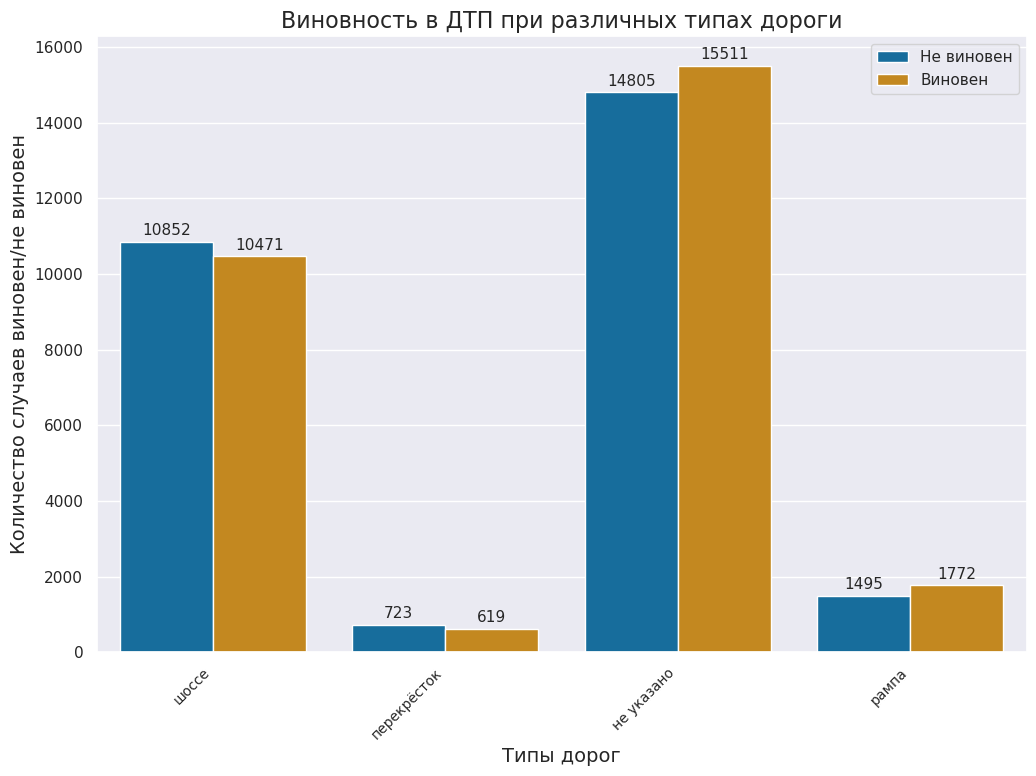

In [67]:
countplot_drow(data_final,
               x_ax='location_type',
               hue='at_fault',
               figsize=(12, 8),
               font_xtick=10,
               size_annot=11,
               color_palette='colorblind',
               title_plot='Виновность в ДТП при различных типах дороги',
               x_label='Типы дорог',
               y_label='Количество случаев виновен/не виновен',
               title_font_size=16,
               xlabel_font_size=14,
               ylabel_font_size=14,
               hue_legend_list = ['Не виновен', 'Виновен'])

Очень много не указанных значений, но придется их оставлять, чтобы не уменьшать выборку. Да и авария на шоссе больше, чем на перекрестках. Хотя по идее должно быть наоборот.

Столбец **`primary_collision_factor`** - категория нарушения.

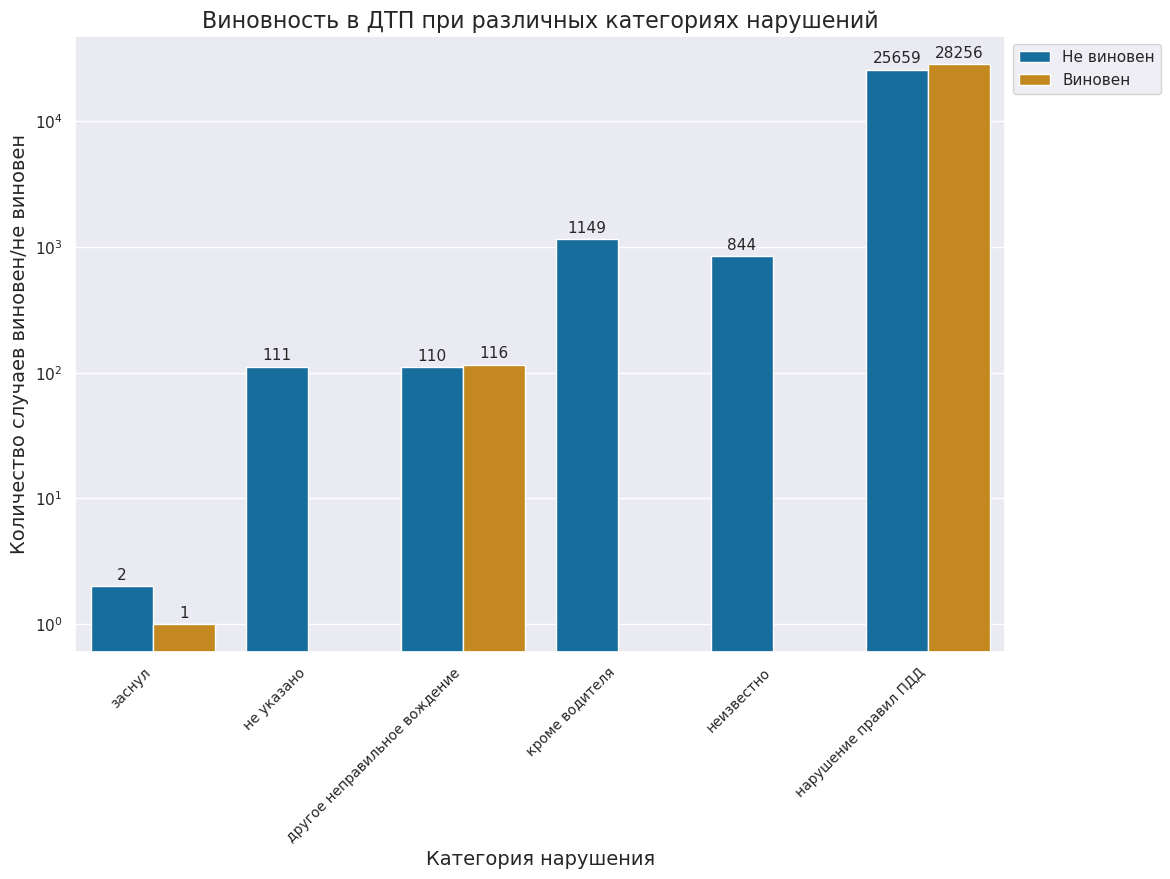

In [68]:
countplot_drow(data_final,
               x_ax='primary_collision_factor',
               hue='at_fault',
               yscale=True,
               figsize=(12, 8),
               font_xtick=10,
               size_annot=11,
               color_palette='colorblind',
               title_plot='Виновность в ДТП при различных категориях нарушений',
               x_label='Категория нарушения',
               y_label='Количество случаев виновен/не виновен',
               title_font_size=16,
               xlabel_font_size=14,
               ylabel_font_size=14,
               hue_legend_list = ['Не виновен', 'Виновен'])

Большинство у нарушения ПДД. Станно что два заснувших не виноваты....

Столбец **`pcf_violation_category`** - тип нарушения.

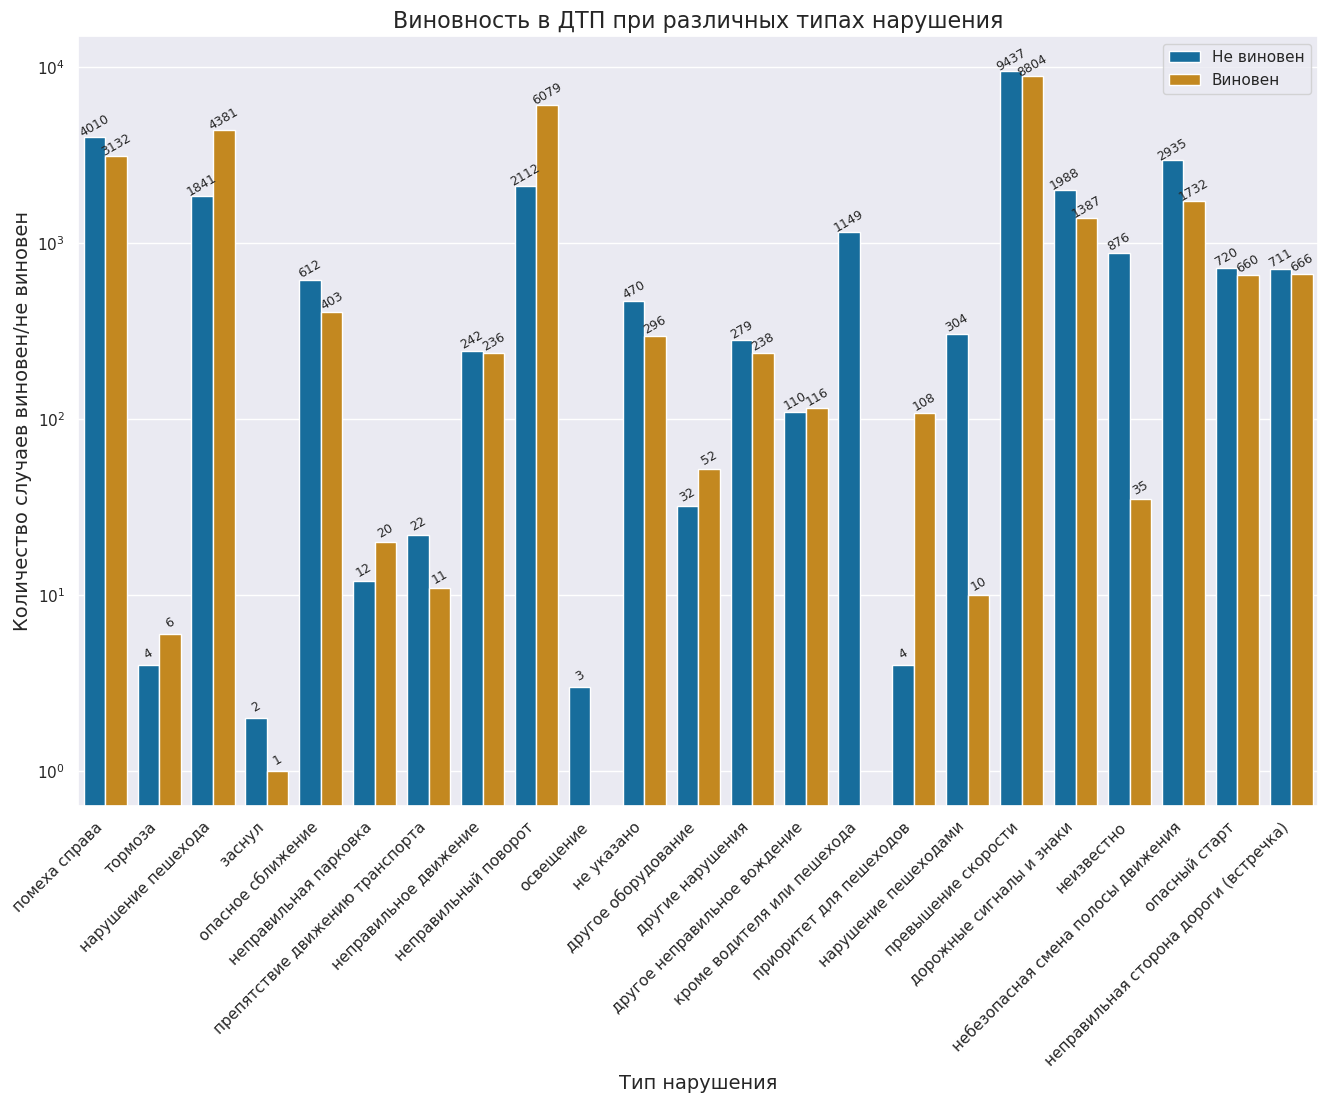

In [69]:
countplot_drow(data_final,
               x_ax='pcf_violation_category',
               hue='at_fault',
               yscale=True,
               figsize=(16, 10),
               font_xtick=11,
               rotation_annot=30,
               size_annot=9,
               color_palette='colorblind',
               title_plot='Виновность в ДТП при различных типах нарушения',
               x_label='Тип нарушения',
               y_label='Количество случаев виновен/не виновен',
               title_font_size=16,
               xlabel_font_size=14,
               ylabel_font_size=14,
               hue_legend_list = ['Не виновен', 'Виновен'])

Тут тройка лидеров стандартная:
- превышение скорости,
- неправильный поворот,
- помеха справа.

Пешеходы то же стандартно любят нарушать.

Столбец **`road_surface`** - состояние дороги.

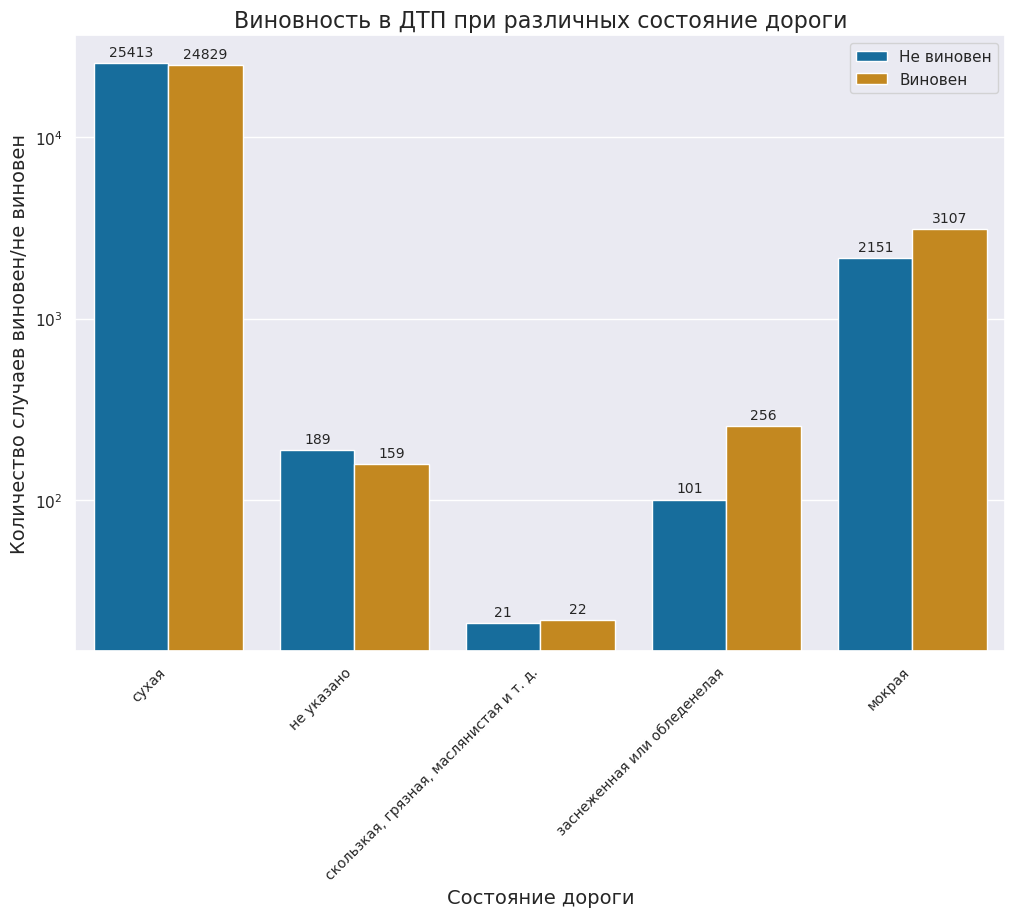

In [70]:
countplot_drow(data_final,
               x_ax='road_surface',
               hue='at_fault',
               yscale=True,
               figsize=(12, 8),
               font_xtick=10,
               size_annot=10,
               color_palette='colorblind',
               title_plot='Виновность в ДТП при различных состояние дороги',
               x_label='Состояние дороги',
               y_label='Количество случаев виновен/не виновен',
               title_font_size=16,
               xlabel_font_size=14,
               ylabel_font_size=14,
               hue_legend_list = ['Не виновен', 'Виновен'])

Тут все стандартно. Количество ДТП уменьшается при ухудшении состояния дороги.

Столбец **`road_condition`** - дорожное состояние (ремонт и т.п.).

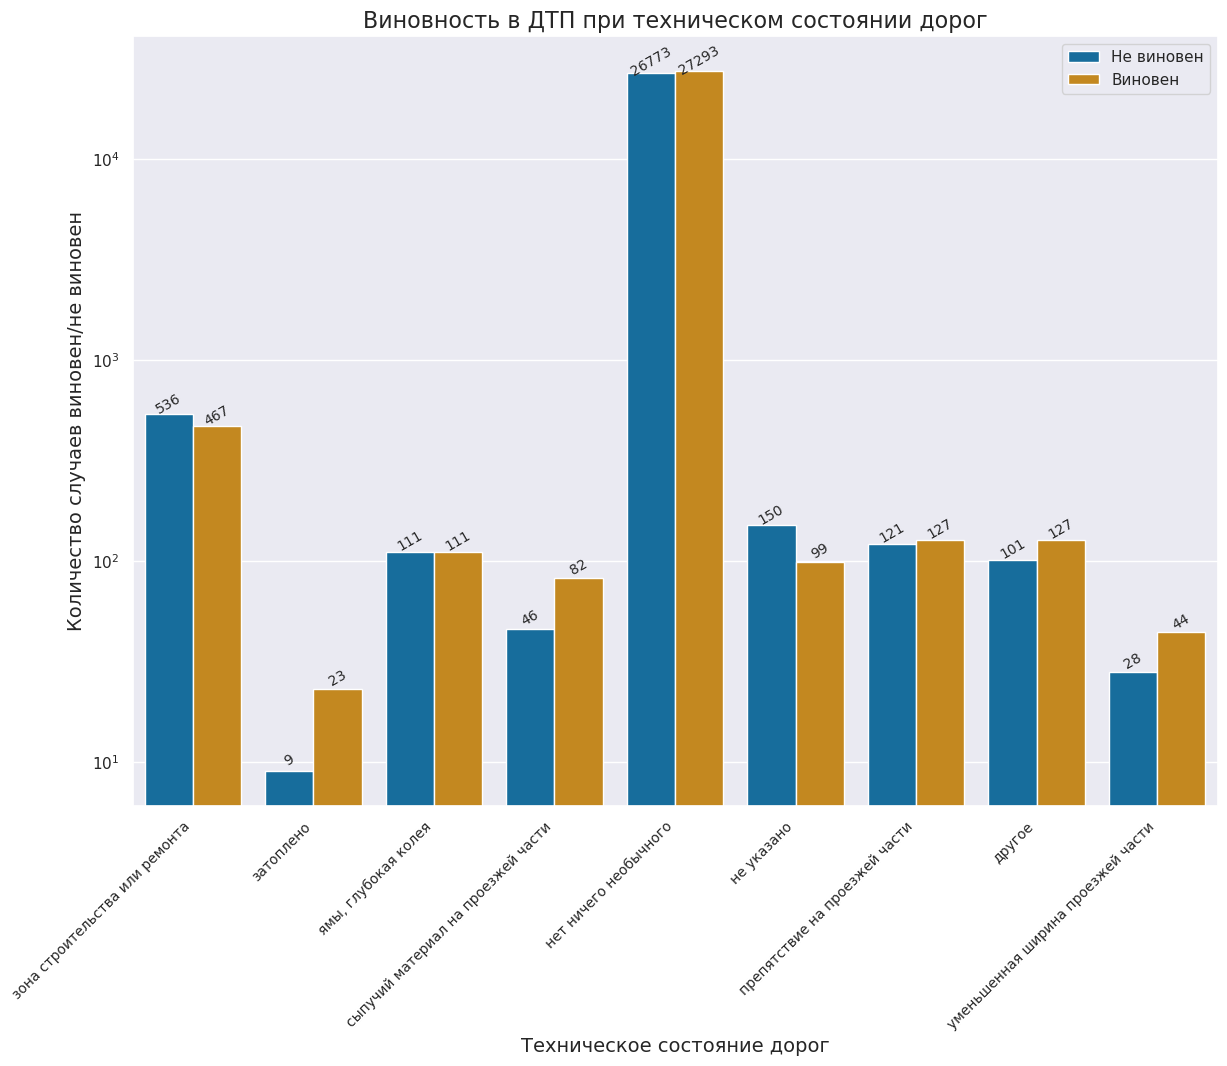

In [71]:
countplot_drow(data_final,
               x_ax='road_condition',
               hue='at_fault',
               yscale=True,
               figsize=(14, 10),
               font_xtick=10,
               rotation_annot=30,
               size_annot=10,
               color_palette='colorblind',
               title_plot='Виновность в ДТП при техническом состоянии дорог',
               x_label='Техническое состояние дорог',
               y_label='Количество случаев виновен/не виновен',
               title_font_size=16,
               xlabel_font_size=14,
               ylabel_font_size=14,
               hue_legend_list = ['Не виновен', 'Виновен'])

Большинство естественно при исправном состоянии. Далее ремонт, ямы и прочее.

Столбец **`lighting`** - освещение.

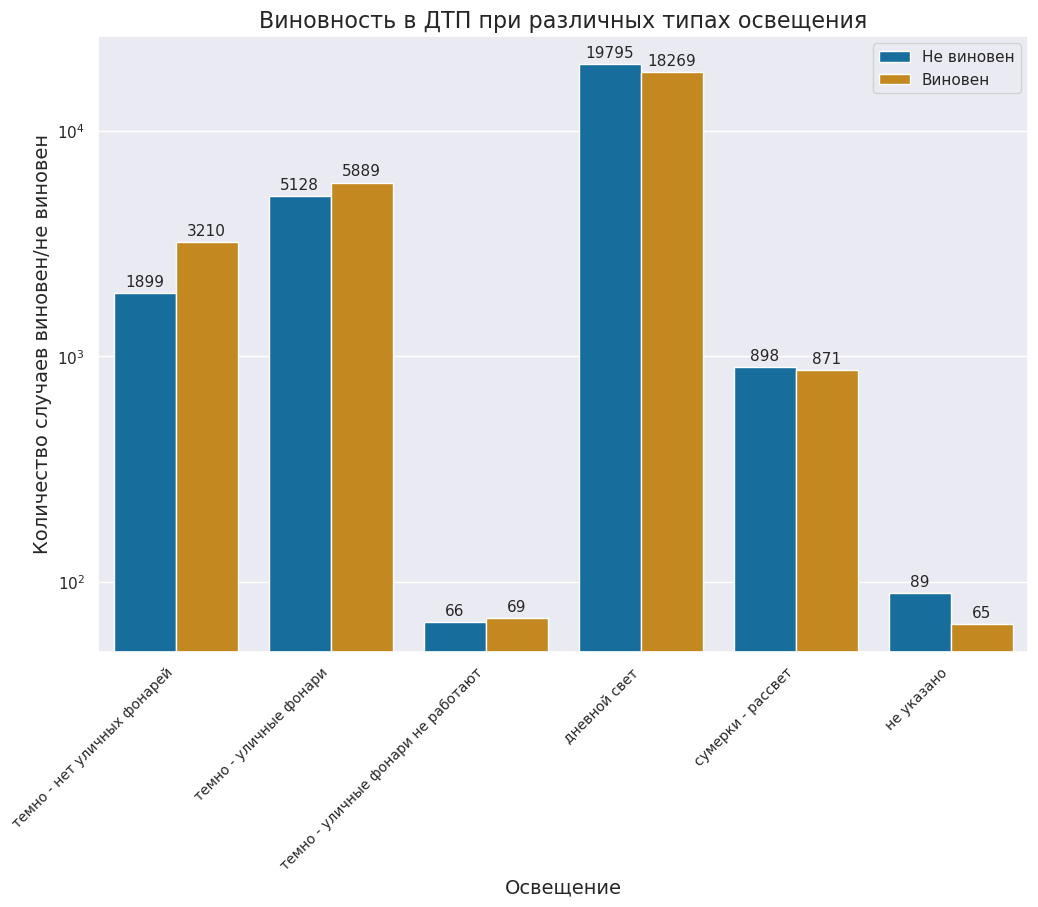

In [72]:
countplot_drow(data_final,
               x_ax='lighting',
               hue='at_fault',
               yscale=True,
               figsize=(12, 8),
               font_xtick=10,
               size_annot=11,
               color_palette='colorblind',
               title_plot='Виновность в ДТП при различных типах освещения',
               x_label='Освещение',
               y_label='Количество случаев виновен/не виновен',
               title_font_size=16,
               xlabel_font_size=14,
               ylabel_font_size=14,
               hue_legend_list = ['Не виновен', 'Виновен'])

Большиство ДТП - днём. А далее всё логично идет на уменьшение. Меньше траффик, внимательность повышается.

Столбец **`party_sobriety`** - состояние: физическое или с учётом принятых лекарств.

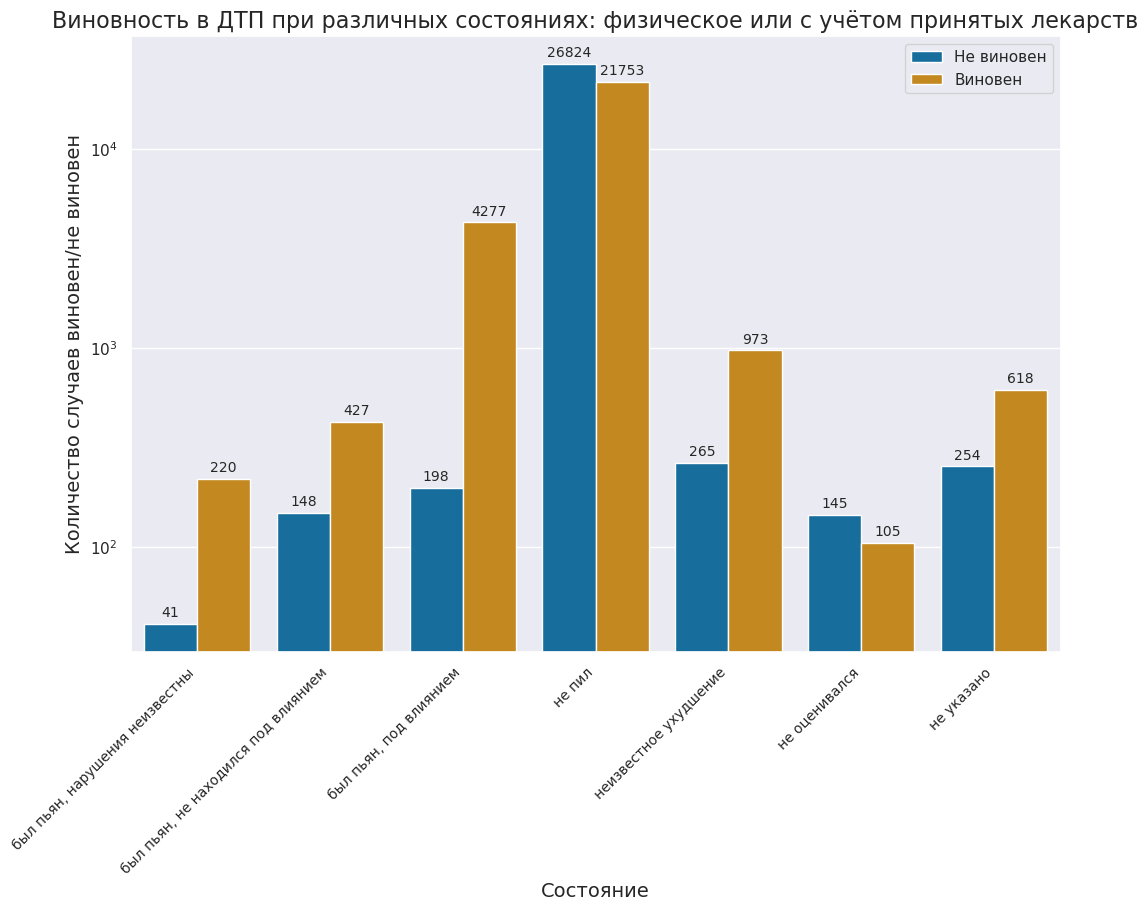

In [73]:
countplot_drow(data_final,
               x_ax='party_sobriety',
               hue='at_fault',
               yscale=True,
               figsize=(12, 8),
               font_xtick=10,
               size_annot=10,
               color_palette='colorblind',
               title_plot='Виновность в ДТП при различных состояниях: физическое или с учётом принятых лекарств',
               x_label='Состояние',
               y_label='Количество случаев виновен/не виновен',
               title_font_size=16,
               xlabel_font_size=14,
               ylabel_font_size=14,
               hue_legend_list = ['Не виновен', 'Виновен'])

Большинство аварий в трезвом виде. Хотя очень странно что есть не виновность под действием алкоголя. Случаи конечно бывают разные...

Столбец **`party_drug_physical`** - трезвость (по наркотикам) участника.

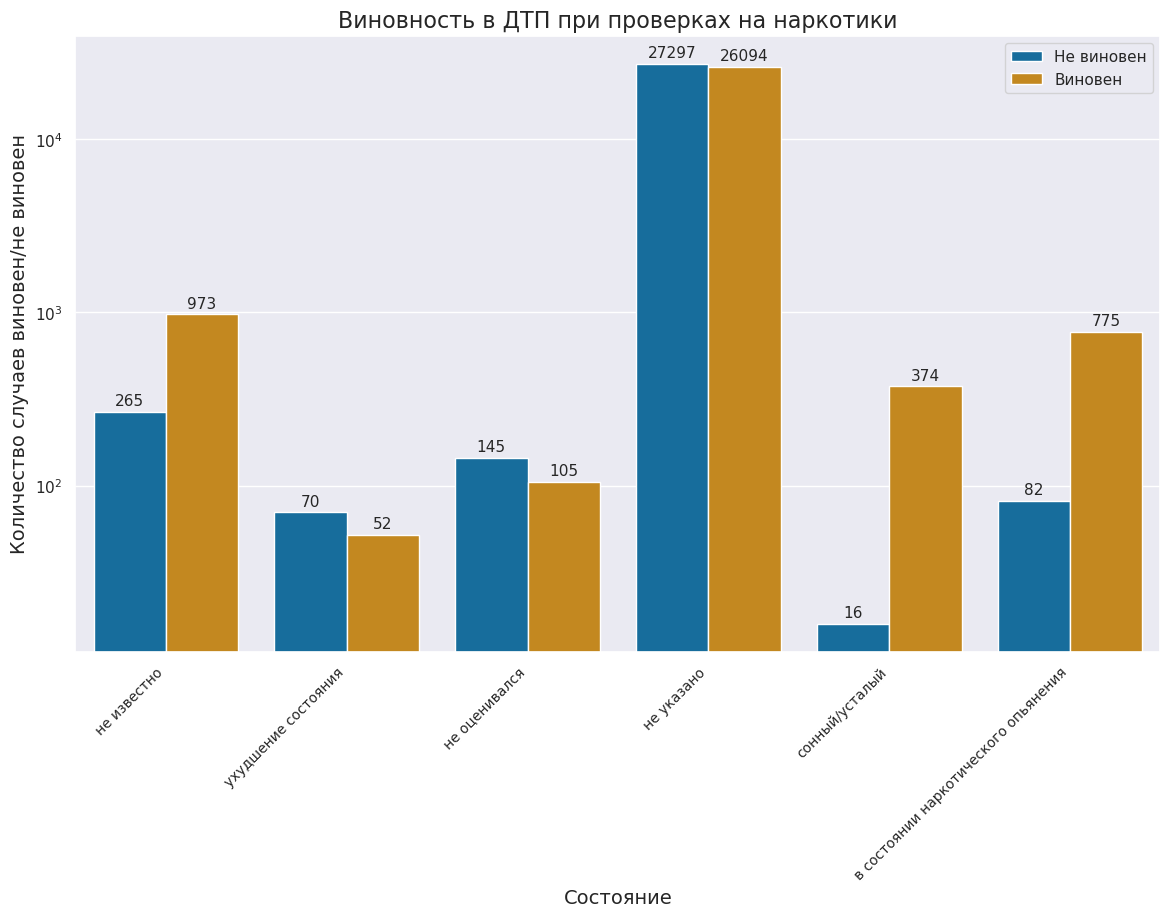

In [74]:
countplot_drow(data_final,
               x_ax='party_drug_physical',
               hue='at_fault',
               yscale=True,
               figsize=(14, 8),
               font_xtick=10,
               size_annot=11,
               color_palette='colorblind',
               title_plot='Виновность в ДТП при проверках на наркотики',
               x_label='Состояние',
               y_label='Количество случаев виновен/не виновен',
               title_font_size=16,
               xlabel_font_size=14,
               ylabel_font_size=14,
               hue_legend_list = ['Не виновен', 'Виновен'])

Очень много не указанного. Удалять значения нельзя, тогда воообще выборка пустая будет.... Оставляем как есть.

Столбец **`cellphone_in_use`** - возможность разговаривать по громкой связи.

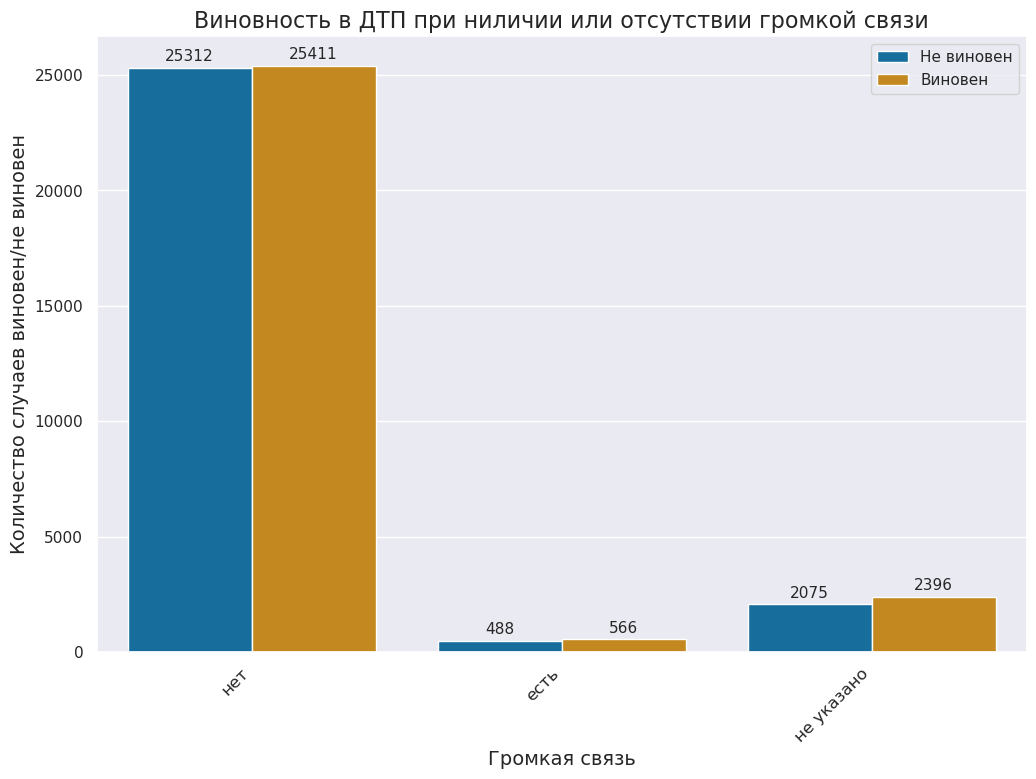

In [75]:
countplot_drow(data_final,
               x_ax='cellphone_in_use',
               hue='at_fault',
               yscale=False,
               figsize=(12, 8),
               font_xtick=12,
               size_annot=11,
               color_palette='colorblind',
               title_plot='Виновность в ДТП при ниличии или отсутствии громкой связи',
               x_label='Громкая связь',
               y_label='Количество случаев виновен/не виновен',
               title_font_size=16,
               xlabel_font_size=14,
               ylabel_font_size=14,
               hue_legend_list = ['Не виновен', 'Виновен'])

Тут прямая зависимость от наличия громкой связи в авто.

Столбец **`vehicle_type`** - тип кузова.

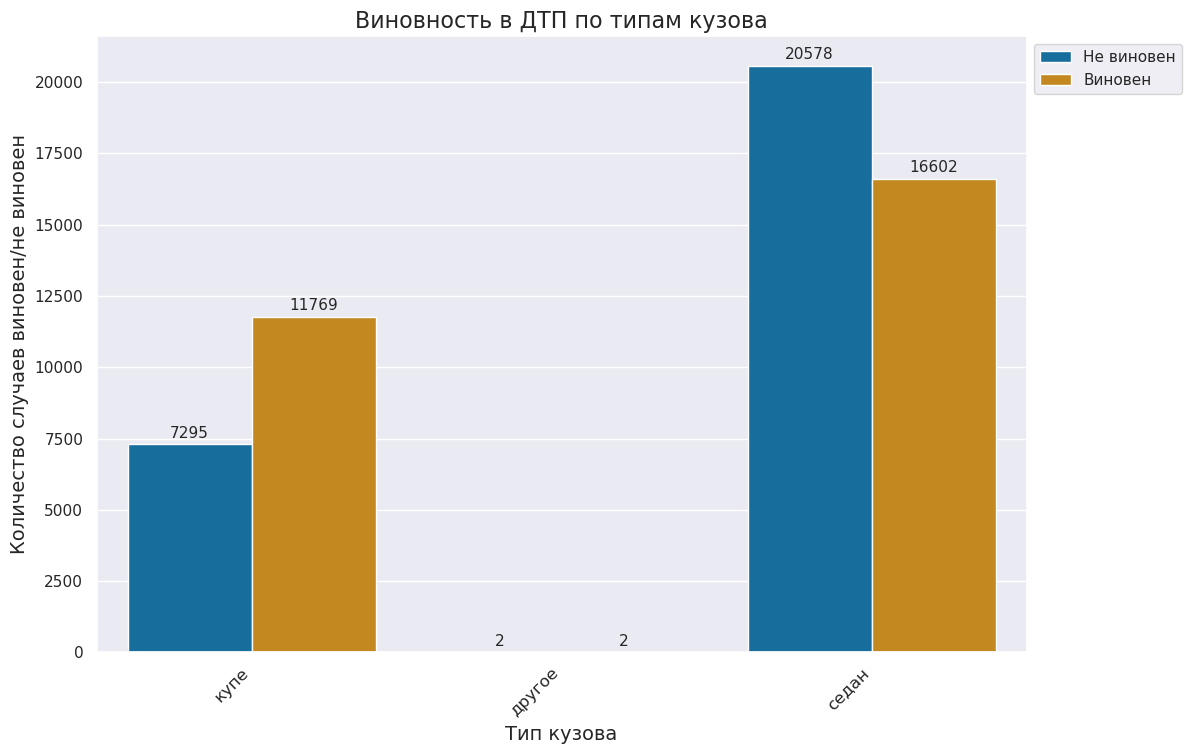

In [76]:
countplot_drow(data_final,
               x_ax='vehicle_type',
               hue='at_fault',
               figsize=(12, 8),
               font_xtick=12,
               size_annot=11,
               color_palette='colorblind',
               title_plot='Виновность в ДТП по типам кузова',
               x_label='Тип кузова',
               y_label='Количество случаев виновен/не виновен',
               title_font_size=16,
               xlabel_font_size=14,
               ylabel_font_size=14,
               hue_legend_list = ['Не виновен', 'Виновен'])

По всей видимости хэтчбэки и минивэны в аварии не попадают..

Столбец **`vehicle_transmission`** - тип КПП.

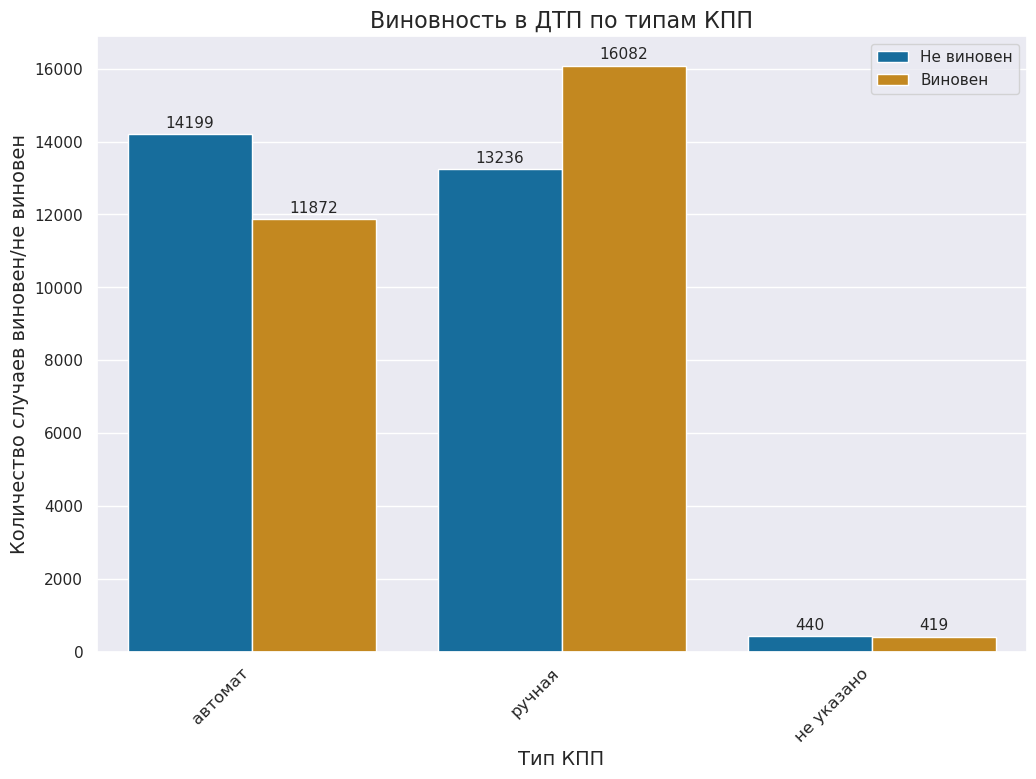

In [77]:
countplot_drow(data_final,
               x_ax='vehicle_transmission',
               hue='at_fault',
               figsize=(12, 8),
               font_xtick=12,
               size_annot=11,
               color_palette='colorblind',
               title_plot='Виновность в ДТП по типам КПП',
               x_label='Тип КПП',
               y_label='Количество случаев виновен/не виновен',
               title_font_size=16,
               xlabel_font_size=14,
               ylabel_font_size=14,
               hue_legend_list = ['Не виновен', 'Виновен'])

При ручной коробке виноватых большей, чем при автомате, что абсолютно логично.

Количественный столбец **`vehicle_age`** - возраст авто.

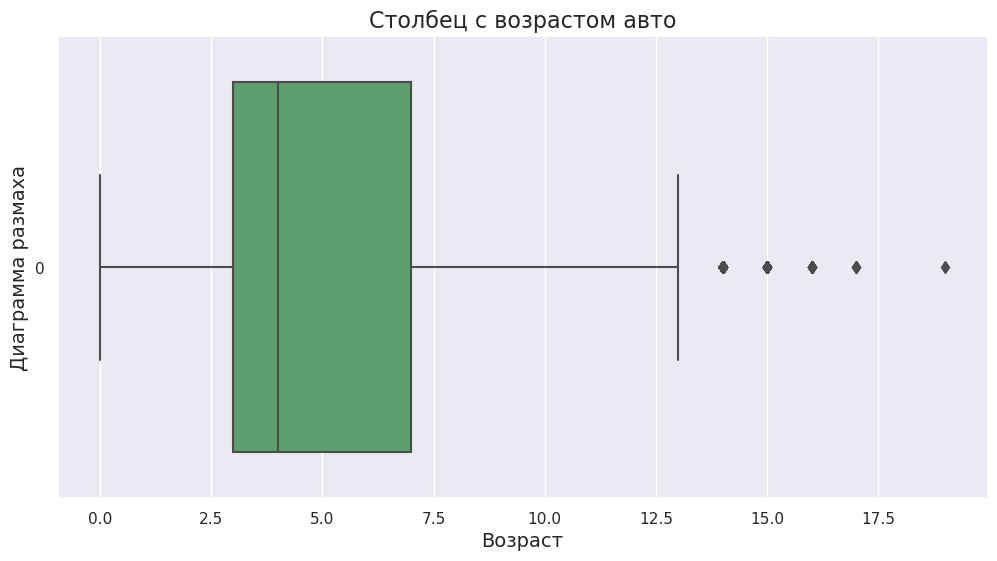

In [78]:
drow_boxplot(column=data_final['vehicle_age'],
             figsize=(12, 6),
             orient='h',
             title_plot='Столбец с возрастом авто',
             x_label='Возраст',
             y_label='Диаграмма размаха')

Есть небольшие выбросы по возрасту авто, но с этим ничего не поделаешь. До 20 лет есть много машин на ходу.

Количественный столбец **`insurance_premium`** - сумма страховки.

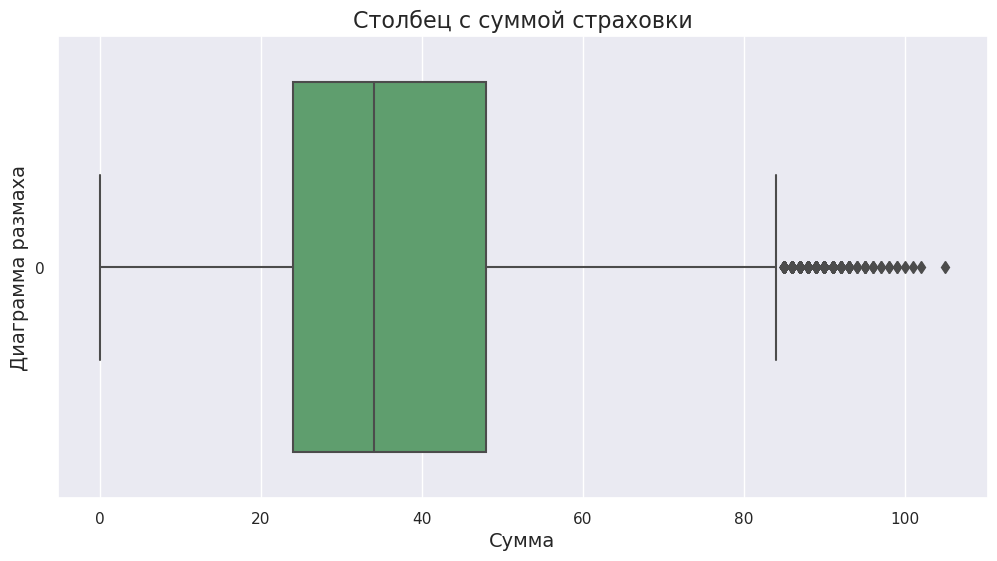

In [79]:
drow_boxplot(column=data_final['insurance_premium'],
             figsize=(12, 6),
             orient='h',
             title_plot='Столбец с суммой страховки',
             x_label='Сумма',
             y_label='Диаграмма размаха')

Оставляем как есть.

Количественный столбец **`distance`** - расстояние от главной дороги (метры).

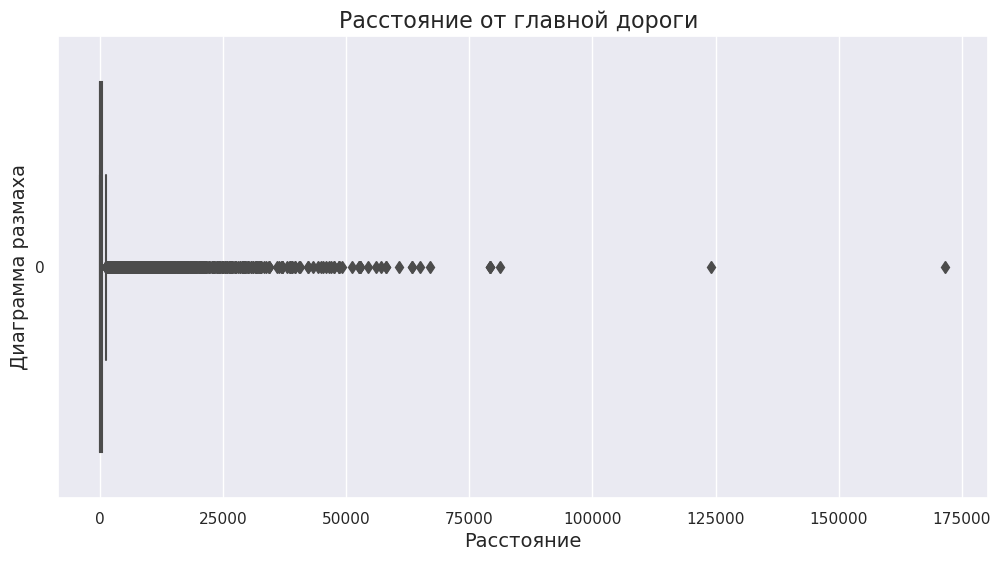

In [80]:
drow_boxplot(column=data_final['distance'],
             figsize=(12, 6),
             orient='h',
             title_plot='Расстояние от главной дороги ',
             x_label='Расстояние',
             y_label='Диаграмма размаха')

Есть выбросы, но это вовзможные варианты.

**Проверка на дисбаланс целевого признака**.

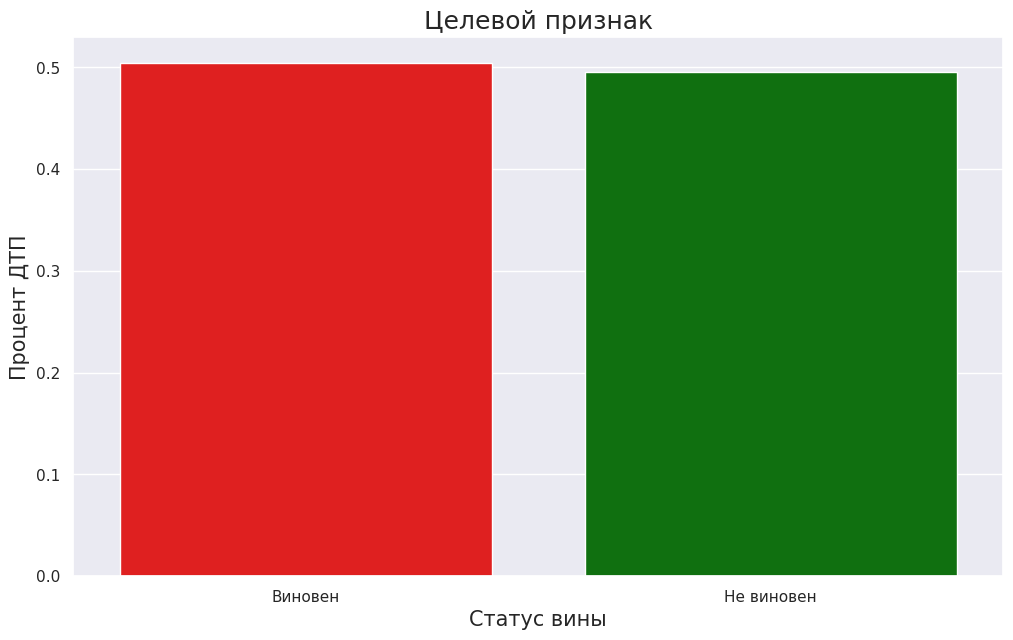

In [81]:
plt.figure(figsize=(12, 7))
plt.title("Целевой признак", fontsize=18)
ax = sns.barplot(x=data_final['at_fault'].unique(),
                 y=data_final['at_fault'].value_counts(normalize=True),
                 palette=['red', 'green'])

plt.xlabel("Статус вины", fontsize=15)
plt.ylabel("Процент ДТП", fontsize=15)
plt.xticks(ticks=[1, 0], labels=['Не виновен', 'Виновен'])

plt.show()

Дисбаланса нет. Целевой признак распределен практичеки пополам. Балансировка классов не потребуется.

**Вывод**.

Датасет для обучения был сформирован при помощи `SQL`-запроса после анализа и выбора необходимых признаков.

Признаки добавленные в модель:

|       Признак            |   Описание                                         |    Таблица |
|--------------------------|----------------------------------------------------|------------|
|`county_city_location`    |Номер географических районов, где произошло ДТП     |`collisions`| 
|`county_location`         |Названия географических районов, где произошло ДТП  |`collisions`|
|`distance`                |Расстояние от главной дороги (метры).               |`collisions`|
|`weather_1`               |Погода                                              |`collisions`|
|`location_type`           |Тип дороги                                          |`collisions`|
|`primary_collision_factor`|Основной фактор аварии                              |`collisions`|
|`pcf_violation_category`  |Категория нарушения                                 |`collisions`|
|`road_surface`            |Состояние дороги                                    |`collisions`|
|`road_condition_1`        |Дорожное состояние (ремонт и т.п.)                  |`collisions`|
|`lighting`                |Освещение                                           |`collisions`|
|`control_device`          |Устройство управления                               |`collisions`|
|__________________________|____________________________________________________|____________|
|`at_fault`                |Виновность участника. **Целевой признак**           |`parties`   |
|`insurance_premium`       |Сумма страховки (тыс. USD)                          |`parties`   |
|`party_sobriety`          |Состояние: физическое или с учётом принятых лекарств|`parties`   |
|`party_drug_physical`     |Трезвость (по наркотикам) участника                 |`parties`   |
|`cellphone_in_use`        |Возможность разговаривать по громкой связи          |`parties`   |
|__________________________|____________________________________________________|____________|
|`vehicle_type`            |Тип кузова                                          |`vehicles`  |
|`vehicle_transmission`    |Тип КПП                                             |`vehicles`  |
|`vehicle_age`             |Возраст автомобиля (в годах)                        |`vehicles`  |
|__________________________|____________________________________________________|____________|


Заполнены пропуски в данных.

Удалены некоторые аномалии в данных.

Датасет русифицирован

Типы данных и размер датасета оптимизированы.

Дисбаланс целевого признака не выявлен.

## Подготовка данных для моделирования и обучение моделей.

### Подготовка данных.

**Выделение целевого признака и признаков для обучения.**

In [82]:
target = data_final['at_fault']
features = data_final.drop(['at_fault'], axis=1)

**Разбиение на тренировочную и тестовую выборки в соотношении 80% на 20%.**

In [83]:
features_train, features_test, target_train, target_test = train_test_split(
    features,
    target,
    test_size=.2,
    random_state=RANDOM,
    stratify=target,
    shuffle=True)

**Проверка разбиения на выборки.**

In [84]:
features_train.shape, target_train.shape, features_test.shape, target_test.shape

((44998, 18), (44998,), (11250, 18), (11250,))

В обучении будут использованы 5 моделей:

- `DecisionTreeClassifier`;
- `RandomForestClassifier`;
- `LogisticRegression`;
- `LGBMClassifier`;
- `CatBoostClassifier`;

**Инициализация моделей.**

In [85]:
model_tree = DecisionTreeClassifier(random_state=RANDOM)
model_forest = RandomForestClassifier(random_state=RANDOM)
model_logreg = LogisticRegression()
model_lgbm = LGBMClassifier(random_state=RANDOM)
model_catboost = CatBoostClassifier(random_state=RANDOM)

Обучение будет проводиться с помощью создания `pipeline` и `GridSearchCV` с кроссвалидацией.

**Создание трансформера для масштабирования признаков для `pipeline` при помощи `make_column_transformer` и `make_column_selector`.**

Для моделей: `DecisionTreeClassifier`, `RandomForestClassifier`, `LGBMClassifier`, `CatBoostClassifier` будет использован `OrdinalEncoder`.

Для модели `LogisticRegression` - `OneHotEncoder`.

Числовые признаки будут преобразованы через `RobustScaler`.

In [86]:
transformer = make_column_transformer(
    (OrdinalEncoder(
        dtype='int16', handle_unknown='use_encoded_value',
        unknown_value=-1), make_column_selector(dtype_include='category')),
    (RobustScaler(), make_column_selector(dtype_exclude='category')),
    remainder='passthrough')

transformer_logreg = make_column_transformer(
    (OneHotEncoder(dtype='int16', handle_unknown='ignore'),
     make_column_selector(dtype_include='category')),
    (RobustScaler(), make_column_selector(dtype_exclude='category')),
    remainder='passthrough')

**Создание сеток с параметрами для перебора и поиска лучшего значения метрики `F1`.**

In [87]:
# Сетка с гиперпараметрами для модели DecisionTreeClassifier
param_grid_tree = {
    'decisiontreeclassifier__criterion': ['gini'],
    'decisiontreeclassifier__splitter': ['best'],
    'decisiontreeclassifier__max_depth': np.arange(1, 12, 2),
    'decisiontreeclassifier__min_samples_leaf': np.arange(1, 12, 2),
}

# Сетка с гиперпараметрами для модели RandomForestClassifier
param_grid_forest = {
    'randomforestclassifier__n_estimators': [100, 200],
    'randomforestclassifier__criterion': ['gini'],
    'randomforestclassifier__max_depth': np.arange(1, 12, 2),
    'randomforestclassifier__min_samples_leaf': np.arange(1, 12, 2),
}
# Сетка с гиперпараметрами для модели LogisticRegression
param_grid_logreg = {
    'logisticregression__solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
    'logisticregression__penalty': ['l2'],
    'logisticregression__C': [0.001, 0.01],
    'logisticregression__max_iter': [3000, 4000]    
}
# Сетка с гиперпараметрами для модели LGBMClassifier
param_grid_lgbm = {
    'lgbmclassifier__boosting_type': ['gbdt'],
    'lgbmclassifier__max_depth': [3, 5, 6, 7, 9, 12, 15],
    'lgbmclassifier__learning_rate':  [0.01, 0.05, 0.1],
    'lgbmclassifier__n_estimators': [200, 300, 400, 500]
}
# Сетка с гиперпараметрами для модели CatBoostClassifier
param_grid_catboost = {
    'catboostclassifier__depth': [4, 6, 8, 10],
    'catboostclassifier__learning_rate': [0.15, 0.2, 0.3],
    'catboostclassifier__iterations': [100, 200],
    'catboostclassifier__verbose': [False]
}

**Создание пайпов для моделей**

In [88]:
pipe_tree = make_pipeline(transformer, model_tree)
pipe_forest = make_pipeline(transformer, model_forest)
pipe_logreg = make_pipeline(transformer_logreg, model_logreg)
pipe_lgbm = make_pipeline(transformer, model_lgbm)
pipe_catboost = make_pipeline(transformer, model_catboost)

**Параметр кроссвалидации.**

In [89]:
cv_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM)

**Финальная сборка в `GridSearchCV`.**

In [90]:
tree_final = GridSearchCV(pipe_tree,
                          param_grid_tree,
                          scoring='f1',
                          cv=cv_kfold,
                          n_jobs=-1)

forest_final = GridSearchCV(pipe_forest,
                            param_grid_forest,
                            scoring='f1',
                            cv=cv_kfold,
                            n_jobs=-1)

logreg_final = GridSearchCV(pipe_logreg,
                            param_grid_logreg,
                            scoring='f1',
                            cv=cv_kfold,
                            n_jobs=-1)

lgbm_final = GridSearchCV(pipe_lgbm,
                          param_grid_lgbm,
                          scoring='f1',
                          cv=cv_kfold,
                          n_jobs=-1)

catboost_final = GridSearchCV(pipe_catboost,
                              param_grid_catboost,
                              scoring='f1',
                              cv=cv_kfold,
                              n_jobs=-1)

**Выбор метрики.**
    
По метрикам получется так:
    
1. `at_fault = 0, predictions = 0` — статус не виновности в ДТП соответсвует прогнозу. - это `TN`.

2. `at_fault = 0, predictions = 1` — был статус не виновности, а модель предсказала вину в ДТП. Компания  может не дополучить прибыль из-за отказа в прокате авто - это `FP`.

3. `at_fault = 1, predictions = 0` — был статус виновности, а модель предсказала не виновность. - это `FN`.

4. `at_fault = 1, predictions = 1` — статус виновности в ДТП соответсвует прогнозу - это `TP`.
    
Компания теряет деньги  `FN` и `TP`, а это `Recall`.
    
Но модель также может ошибиться  в ложноположительную сторону `FP` и компания недополучит прибыль а это `Precision`. 

Полнота и точность оценивают качество прогноза положительного класса с разных позиций. `Recall` описывает, как хорошо модель разобралась в особенностях этого класса и распознала его. `Precision` выявляет, не переусердствует ли модель, присваивая положительные метки.
    
Поэтому можно выбрать агрегирующую метрику  — `F1-меру`, как среднее гармоническое полноты и точности.

</div>

### Обучение моделей.

**Обучение `DecisionTreeClassifier`.**

In [91]:
tree_final.fit(features_train, target_train)

print(f"Модель DecisionTreeClassifier обучена.")

Модель DecisionTreeClassifier обучена.


**Результат.**

In [92]:
print(
    f"Метрика F1 модели на тренировочной выборке с кроссвалидацией: {tree_final.best_score_:.4f}"
)
print()
print(f"Лучшие гиперпараметры модели: {tree_final.best_params_}")

Метрика F1 модели на тренировочной выборке с кроссвалидацией: 0.6833

Лучшие гиперпараметры модели: {'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 7, 'decisiontreeclassifier__min_samples_leaf': 3, 'decisiontreeclassifier__splitter': 'best'}


**Обучение `RandomForestClassifier`.**

In [93]:
forest_final.fit(features_train, target_train)

print(f"Модель RandomForestClassifier обучена.")

Модель RandomForestClassifier обучена.


**Результат.**

In [94]:
print(
    f"Метрика F1 модели на тренировочной выборке с кроссвалидацией: {forest_final.best_score_:.4f}"
)
print()
print(f"Лучшие гиперпараметры модели: {forest_final.best_params_}")

Метрика F1 модели на тренировочной выборке с кроссвалидацией: 0.6788

Лучшие гиперпараметры модели: {'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__max_depth': 11, 'randomforestclassifier__min_samples_leaf': 11, 'randomforestclassifier__n_estimators': 100}


**Обучение `LogisticRegression`.**

In [95]:
logreg_final.fit(features_train, target_train)

print(f"Модель LogisticRegression обучена.")

Модель LogisticRegression обучена.


**Результат.**

In [96]:
print(
    f"Метрика F1 модели на тренировочной выборке с кроссвалидацией: {logreg_final.best_score_:.4f}"
)
print()
print(f"Лучшие гиперпараметры модели: {logreg_final.best_params_}")

Метрика F1 модели на тренировочной выборке с кроссвалидацией: 0.6522

Лучшие гиперпараметры модели: {'logisticregression__C': 0.01, 'logisticregression__max_iter': 3000, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}


**Обучение `LGBMClassifier`.**

In [97]:
lgbm_final.fit(features_train, target_train)

print(f"Модель LGBMClassifier обучена.")

Модель LGBMClassifier обучена.


**Результат.**

In [98]:
print(
    f"Метрика F1 модели на тренировочной выборке с кроссвалидацией: {lgbm_final.best_score_:.4f}"
)
print()
print(f"Лучшие гиперпараметры модели: {lgbm_final.best_params_}")

Метрика F1 модели на тренировочной выборке с кроссвалидацией: 0.6956

Лучшие гиперпараметры модели: {'lgbmclassifier__boosting_type': 'gbdt', 'lgbmclassifier__learning_rate': 0.1, 'lgbmclassifier__max_depth': 3, 'lgbmclassifier__n_estimators': 300}


**Обучение `CatBoostClassifier`.**

In [99]:
catboost_final.fit(features_train, target_train)

print(f"Модель CatBoostClassifier обучена.")

Модель CatBoostClassifier обучена.


**Результат.**

In [100]:
print(
    f"Метрика F1 модели на тренировочной выборке с кроссвалидацией: {catboost_final.best_score_:.4f}"
)
print()
print(f"Лучшие гиперпараметры модели: {catboost_final.best_params_}")

Метрика F1 модели на тренировочной выборке с кроссвалидацией: 0.6967

Лучшие гиперпараметры модели: {'catboostclassifier__depth': 6, 'catboostclassifier__iterations': 100, 'catboostclassifier__learning_rate': 0.2, 'catboostclassifier__verbose': False}


**Результирующая таблица с метриками и гиперпараметрами.**

In [101]:
data_f1 = {
    'F1 на трейне после кроссвалидации': [
        round(tree_final.best_score_, 4), round(forest_final.best_score_, 4),
        round(logreg_final.best_score_, 4), round(lgbm_final.best_score_, 4),
        round(catboost_final.best_score_, 4)
    ]
}

data_result = pd.DataFrame(data_f1,
                           index=[
                               'DecisionTreeClassifier',
                               'RandomForestClassifier', 'LogisticRegression',
                               'LGBMClassifier', 'CatBoostClassifier'
                           ])

data_result

,F1 на трейне после кроссвалидации
DecisionTreeClassifier,0.6833
RandomForestClassifier,0.6788
LogisticRegression,0.6522
LGBMClassifier,0.6956
CatBoostClassifier,0.6967


In [102]:
best_model = catboost_final

Все модели обучены, значения метрик по моделям нахолдятся достаточно близко. Лучшая модель это `CatBoostClassifier`. `F1` - **0.6967**. 

Лучшие гиперпараметры {'catboostclassifier__depth': 6, 'catboostclassifier__iterations': 100, 'catboostclassifier__learning_rate': 0.2, 'catboostclassifier__verbose': False}.

## Проверка лучшей модели в работе.

### Получение метрики и предсказанных значений на тестовой выборке.

In [103]:
predicted = best_model.best_estimator_.predict(features_test)

f1_test = round(f1_score(predicted, target_test), 4)

print(f"Метрика F1 лучшей модели на тестовой выборке: {f1_test}")

Метрика F1 лучшей модели на тестовой выборке: 0.6916


### График полноты и точности.  

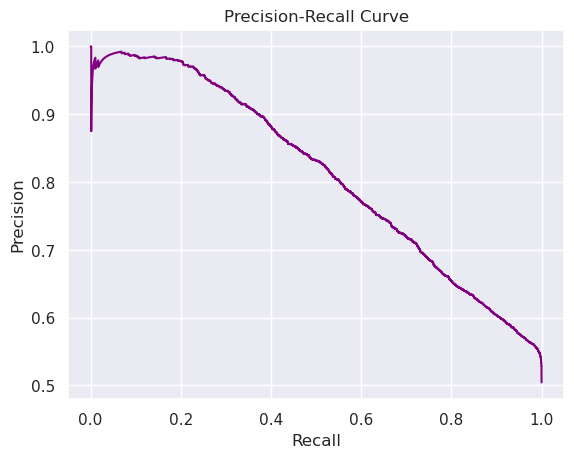

In [104]:
target_score = best_model.best_estimator_.predict_proba(features_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(target_test,
                                                       target_score)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

### Матрица ошибок.

In [105]:
conf_matrix = confusion_matrix(target_test, predicted)

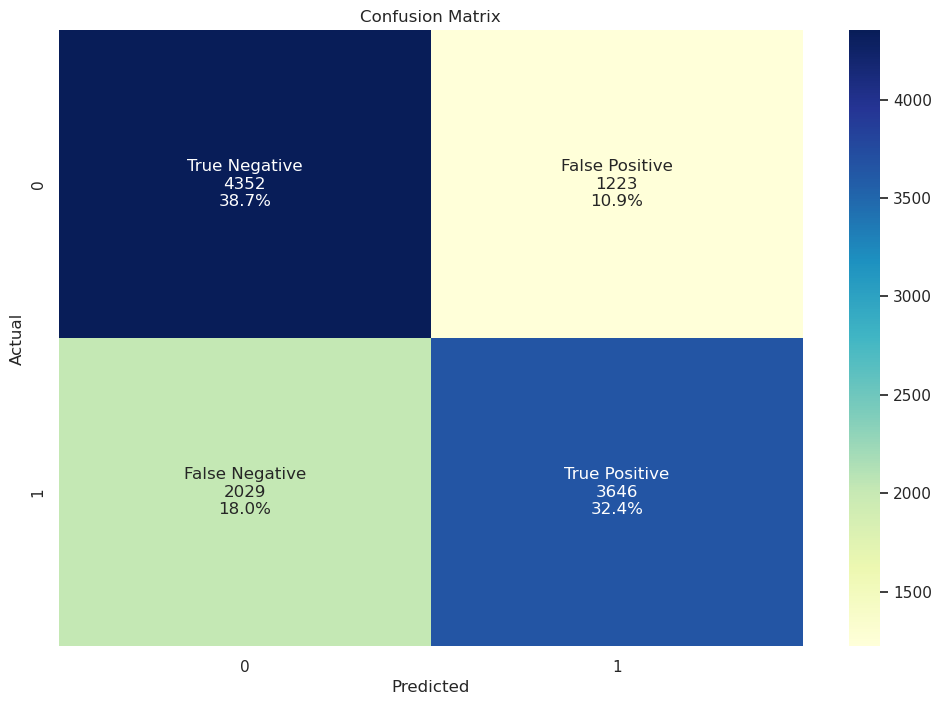

In [106]:
plt.figure(figsize=(12, 8))

classes = [
    "True Negative", "False Positive", "False Negative", "True Positive"
]

values = ["{0:0.0f}".format(x) for x in conf_matrix.flatten()]

percentages = [
    "{0:.1%}".format(x) for x in conf_matrix.flatten() / np.sum(conf_matrix)
]

combined = [f"{i}\n{j}\n{k}" for i, j, k in zip(classes, values, percentages)]
combined = np.asarray(combined).reshape(2, 2)

ax = sns.heatmap(conf_matrix, annot=combined, fmt="", cmap='YlGnBu')

ax.set(title='Confusion Matrix')
ax.set(xlabel='Predicted', ylabel='Actual')

plt.show()

In [107]:
TN = conf_matrix[0][0]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]
TP = conf_matrix[1][1]

total = TN + TP + FP + FN

print('Всего предсказаний:', total)
print(f'Правильно предсказанные ответы: {round((TP+TN)*100/total, 2)}%')
print(f'Ошибки в прогнозах: {round((FP+FN)*100/total, 2)}%')
print(f'Recall: {round(TP * 100/(TP + FN), 2)}%')
print(f'Precision: {round(TP * 100/(TP + FP), 2)}%')

Всего предсказаний: 11250
Правильно предсказанные ответы: 71.09%
Ошибки в прогнозах: 28.91%
Recall: 64.25%
Precision: 74.88%


Что в итоге:

1. По главной диагонали (от верхнего левого угла) выстроены правильные прогнозы:
   
   - **TN** в левом верхнем углу. 4352 правильных ответов. Статус не виновности в ДТП соответсвует прогнозу.
   - **TP** в правом нижнем углу. 3646 правильных ответов. Статус виновности в ДТП соответсвует прогнозу.

2. Вне главной диагонали — ошибочные варианты:

   - **FP** в правом верхнем углу. 1223 ошибок ошибочных предсказаний первого рода. Был статус не виновности, а модель предсказала вину в ДТП. Компания  может не дополучить прибыль из-за отказа в прокате авто. 
   - **FN** в левом нижнем углу. 2029 ошибочных предсказаний второго рода. Был статус виновности, а модель предсказала не виновность. Данное предсказание самое убыточное...
   
   
Для заказчика важно, чтобы модель правидно предсказывала вероятность вины ДТП. Соответственно необходимо, чтобы было как можно меньше **FN**, т.к. основные убытки из-за этого типа ошибок, ну и **FP** то же важен, т.к. это недополученнная прибыль.

Метрика `Recall` получилась 64.25%,  `Precision` - 74.88%. Обе метрики не высокие. Желательно их улучшать....

### Анализ важности основных факторов, влияющих на вероятность ДТП.

Создадим датасет из признаков с долями соответсвующими их влиянию на метрику.

Важность признаков для модели можно получить при помощи метода: `best_estimator_._final_estimator.feature_importances_`. 

In [108]:
feature_importances = best_model.best_estimator_._final_estimator.feature_importances_

In [109]:
feature_importance = pd.Series(
    feature_importances,
    data_final.drop(['at_fault'], axis=1).columns).to_frame().reset_index()

feature_importance.rename(columns={
    'index': 'feature',
    0: 'value'
}, inplace=True)

feature_importance = feature_importance.sort_values(by='value',
                                                    ascending=False)

Визуализация.

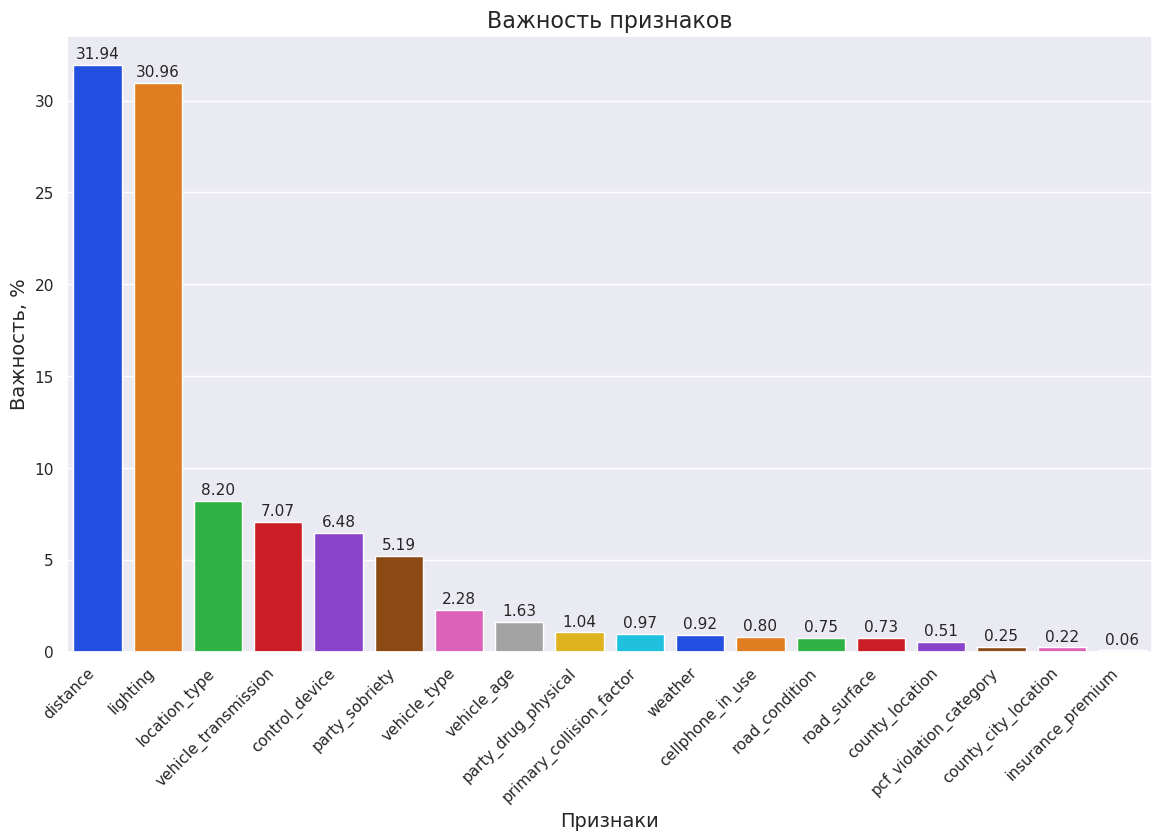

In [110]:
barplot_drow(feature_importance,
             feature_importance['feature'],
             feature_importance['value'],
             figsize=(14, 8),
             float_annot=True,
             font_xtick=11,
             size_annot=11,
             color_palette='bright',
             title_plot='Важность признаков',
             x_label='Признаки',
             y_label='Важность, %',
             title_font_size=16,
             xlabel_font_size=14,
             ylabel_font_size=14)

Самое большое влияние на модель оказывают:

- `distance` -  расстояние от главной дороги (метры или дюймы) - 31.94%. Удаленность от главной дороги действительно может влиять.
- `lighting` - освещение - 30.96%, это существенный фактор. Освещение прямо влияет на возможность аварии.
- `location_type` - тип дороги - 8.20%, шоссе, перекресток и т.д. 
- `vehicle_transmission`- тип коробки передач - 7.07%, тут все от опыта  зависит.
- `control_device` - устройство управления - 6.48% 
- `party_sobriety` - состояние: физическое или с учётом принятых лекарств - 5.19%

## Выводы

В результате исследования были выполнены следующие этапы:
 
1. Загрузка таблиц `SQL`.
2. Статистический анализ факторов ДТП (10 аналитических задач).
3. Создан датасет исходя из пожеланий заказчика.

   - Тип виновника — только машина (`car`).
   - Cлучаи, когда ДТП привело к любым значимым повреждениям автомобиля любого из участников — все, кроме типа SCRATCH (царапина).
   - Для моделирования берутся данные только за 2012 год.
   - Обязательное условие — учесть фактор возраста автомобиля.
   - Подготовка исходной таблицы осуществляется с помощью sql-запроса.
     
4. Проведена предобработка данных и иследовательский анализ.
5. Обучены несколько моделей с перебором гиперпараметров и кроссвалидацией.

Лучшая модель -  Лучшая модель это `CatBoostClassifier`. `F1` на тестовой выборке - **0.6916**.

- всего предсказаний: **11250**;
- правильно предсказанные ответы: **71.09%**;
- ошибки в прогнозах: **28.91%**;
- `Recall`: **64.25%**;
- `Precision`: **74.88%**;

Самое большое влияние на модель оказывают:

- `distance` -  расстояние от главной дороги (метры или дюймы) - 31.94%. Удаленность от главной дороги действительно может влиять.
- `lighting` - освещение - 30.96%, это существенный фактор. Освещение прямо влияет на возможность аварии.

К сожалению информация по 2012 году не полная по случаям ДТП. После июня очень мало случаев. Возможмо улучшить метрику можно сделав тренировочную выборку за 2011 год с выделением месяца и веремени ДТП, а тестировать на 2012 году. Но условие заказчика был 2012 год...

Рекомендации:

Т.к. в БД и соответсвенно в датасете очень много данных, которые описывают уже свершившийся факт нужно доработать БД.

Необходимо добавлять в БД и датасет личностные характерискики водителя, которых в базе нету.

Эти характеристики будут прямо влиять на вероятность ппопадания и в ДТП и виновности/не виновности в ДТП.

Могут помочь следующие характеристики:

- возраст водителя,
- стаж водителя,
- количество нарушений за все время (тип, кол-во),
- попадал ли в аварии,
- количество ДТП, если попадал в аварии,
- количество раз, когда быда признана вина в ДТП.
- опционально: прочие нарушения не за рулем(административки за нахождение в нетрезвом виде, характеристика личности если таковая ведется при вынесение адпинистративных штрафов и т.п.).